In [101]:
import pandas as pd
import numpy as np


from datetime import datetime
# import pymongo
# from pymongo import MongoClient
import json


import seaborn as sns
import matplotlib.pyplot as plt


import sys 
import os
import warnings
warnings.filterwarnings("ignore")
sys.path.append(os.path.abspath("../src"))   
import soporte_preprocesamiento as f
import soporte_outliers as d

pd.set_option('display.max_columns', None)

In [102]:
df_pequeñas=pd.read_csv("../datos/red_piso/Datos_segmentados/datos_red_piso_pequeñas.csv", index_col=0)
df_medianas=pd.read_csv("../datos/red_piso/Datos_segmentados/datos_red_piso_medianas.csv", index_col=0)
df_amplias=pd.read_csv("../datos/red_piso/Datos_segmentados/datos_red_piso_amplias.csv", index_col=0)
df_grandes=pd.read_csv("../datos/red_piso/Datos_segmentados/datos_red_piso_grandes.csv", index_col=0)

# **VIVIENDAS PEQUEÑAS**

In [103]:
df_pequeñas.head()

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif,categoria
76,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 31 y 45 m2,1,1,209440,No tiene garaje,De 1971 a 1980,Es accesible,casi perfecto,Viviendas pequeñas
91,No,Barcelona,Cataluña,9000,IBI,5.40,No,No tiene calefacción,Hasta 30 m2,1,2,89000,No tiene garaje,Anterior a 1900,No es accesible,levemente mejorable,Viviendas pequeñas
92,No,Barcelona,Cataluña,9000,IBI,5.40,No,No tiene calefacción,Entre 31 y 45 m2,1,2,100000,No tiene garaje,De 1951 a 1960,No es accesible,casi perfecto,Viviendas pequeñas
93,No,Barcelona,Cataluña,9000,IBI,5.40,No,No tiene calefacción,Entre 31 y 45 m2,1,2,130000,No tiene garaje,De 1921 a 1940,No es accesible,casi perfecto,Viviendas pequeñas
101,Si,Barcelona,Cataluña,9000,IBI,5.40,No,Individual,Entre 31 y 45 m2,1,1,240000,No tiene garaje,De 1991 a 2000,No es accesible,casi perfecto,Viviendas pequeñas


# **EDA**

In [104]:
f.exploracion_dataframe(df_pequeñas,"valor")

El número de datos es 177 y el de columnas es 17

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 3

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
ascensor,object
idq_pv,object
ccaa,object
ayudas_ccaa,int64
bonificaciones,object
radiacion_solar,float64
aguacalcent,object
calefac,object
metrosvi,object
naseos,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna ASCENSOR tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
ascensor,
No,95
Si,82


La columna IDQ_PV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 8 categorías (5/8)


,count
idq_pv,
Madrid,163
Barcelona,5
Zaragoza,3
Murcia,2
Alicante,1


La columna CCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 8 categorías (5/8)


,count
ccaa,
Madrid,163
Cataluña,5
Aragón,3
Murcia,2
Comunidad Valenciana,1


La columna BONIFICACIONES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
bonificaciones,
IBI y ICIO,167
IBI,10


La columna AGUACALCENT tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
aguacalcent,
No,172
Si,5


La columna CALEFAC tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
calefac,
Individual,103
No tiene calefacción,66
Colectiva,8


La columna METROSVI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
metrosvi,
Entre 31 y 45 m2,140
Hasta 30 m2,37


La columna NPLAZASGAR tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
nplazasgar,
No tiene garaje,173
1,4


La columna ANNOEDIFINTERV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 12 categorías (5/12)


,count
annoedifinterv,
De 1921 a 1940,42
De 1961 a 1970,35
Anterior a 1900,26
De 1900 a 1920,16
De 1971 a 1980,12


La columna ACCESOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
accesoedif,
No es accesible,144
Es accesible,33


La columna ESTADOEDIF tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 5 categorías (5/5)


,count
estadoedif,
casi perfecto,103
levemente mejorable,44
Desconocido,19
mejorable,9
perfecto,2


La columna CATEGORIA tiene los siguientes valores únicos:
Mostrando 1 categorías con más valores del total de 1 categorías (1/1)


,count
categoria,
Viviendas pequeñas,177



----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
ayudas_ccaa,177.0,6980.225989,503.853283,4500.0,7000.00,7000.00,7000.00,9000.0
radiacion_solar,177.0,5.728588,0.062964,5.4,5.74,5.74,5.74,6.0
naseos,177.0,1.011299,0.150329,1.0,1.00,1.00,1.00,3.0
ndormito,177.0,1.395480,0.512992,1.0,1.00,1.00,2.00,3.0
valor,177.0,173207.830508,70408.955925,37000.0,122000.00,165000.00,210500.00,460000.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
ascensor,177,2,No,95
idq_pv,177,8,Madrid,163
ccaa,177,8,Madrid,163
bonificaciones,177,2,IBI y ICIO,167
aguacalcent,177,2,No,172
calefac,177,3,Individual,103
metrosvi,177,2,Entre 31 y 45 m2,140
nplazasgar,177,2,No tiene garaje,173
annoedifinterv,177,12,De 1921 a 1940,42
accesoedif,177,2,No es accesible,144



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 76 to 3823
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ascensor         177 non-null    object 
 1   idq_pv           177 non-null    object 
 2   ccaa             177 non-null    object 
 3   ayudas_ccaa      177 non-null    int64  
 4   bonificaciones   177 non-null    object 
 5   radiacion_solar  177 non-null    float64
 6   aguacalcent      177 non-null    object 
 7   calefac          177 non-null    object 
 8   metrosvi         177 non-null    object 
 9   naseos           177 non-null    int64  
 10  ndormito         177 non-null    int64  
 11  valor            177 non-null    int64  
 12  nplazasgar       177 non-null    object 
 13  annoedifinterv   177 non-null    object 
 14  accesoedif       177 non-null    object 
 15  estadoedif       177 non-null    object 
 16  c

None

Lo que he podido ver hasta el momento es que a simple vista no parece haber muchos outliers ya que se distorsiona muy levemente la media. En el caso del valor si que se observa una media superior a la moda lo que muestra que habría un sesgo hacia las viviendas más caras. Pero por lo general no se detectan outliers (univariados) correspondientes a datos erróneos.

In [105]:
df_pequeñas["ndormito"].value_counts()   #observamos que en las viendas pequeñas el numero de habitaciones es coherente

ndormito
1    109
2     66
3      2
Name: count, dtype: int64

In [106]:
df_pequeñas.columns

Index(['ascensor', 'idq_pv', 'ccaa', 'ayudas_ccaa', 'bonificaciones',
       'radiacion_solar', 'aguacalcent', 'calefac', 'metrosvi', 'naseos',
       'ndormito', 'valor', 'nplazasgar', 'annoedifinterv', 'accesoedif',
       'estadoedif', 'categoria'],
      dtype='object')

***Observamos el estado de las viviendas por si vemos algo raro***

In [107]:
df_pequeñas["estadoedif"].value_counts()

estadoedif
casi perfecto          103
levemente mejorable     44
Desconocido             19
mejorable                9
perfecto                 2
Name: count, dtype: int64

In [108]:
df_pequeñas["naseos"].value_counts() #observamos que en las viendas pequeñas el numero de aseos es coherente

naseos
1    176
3      1
Name: count, dtype: int64

VEO LA DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS

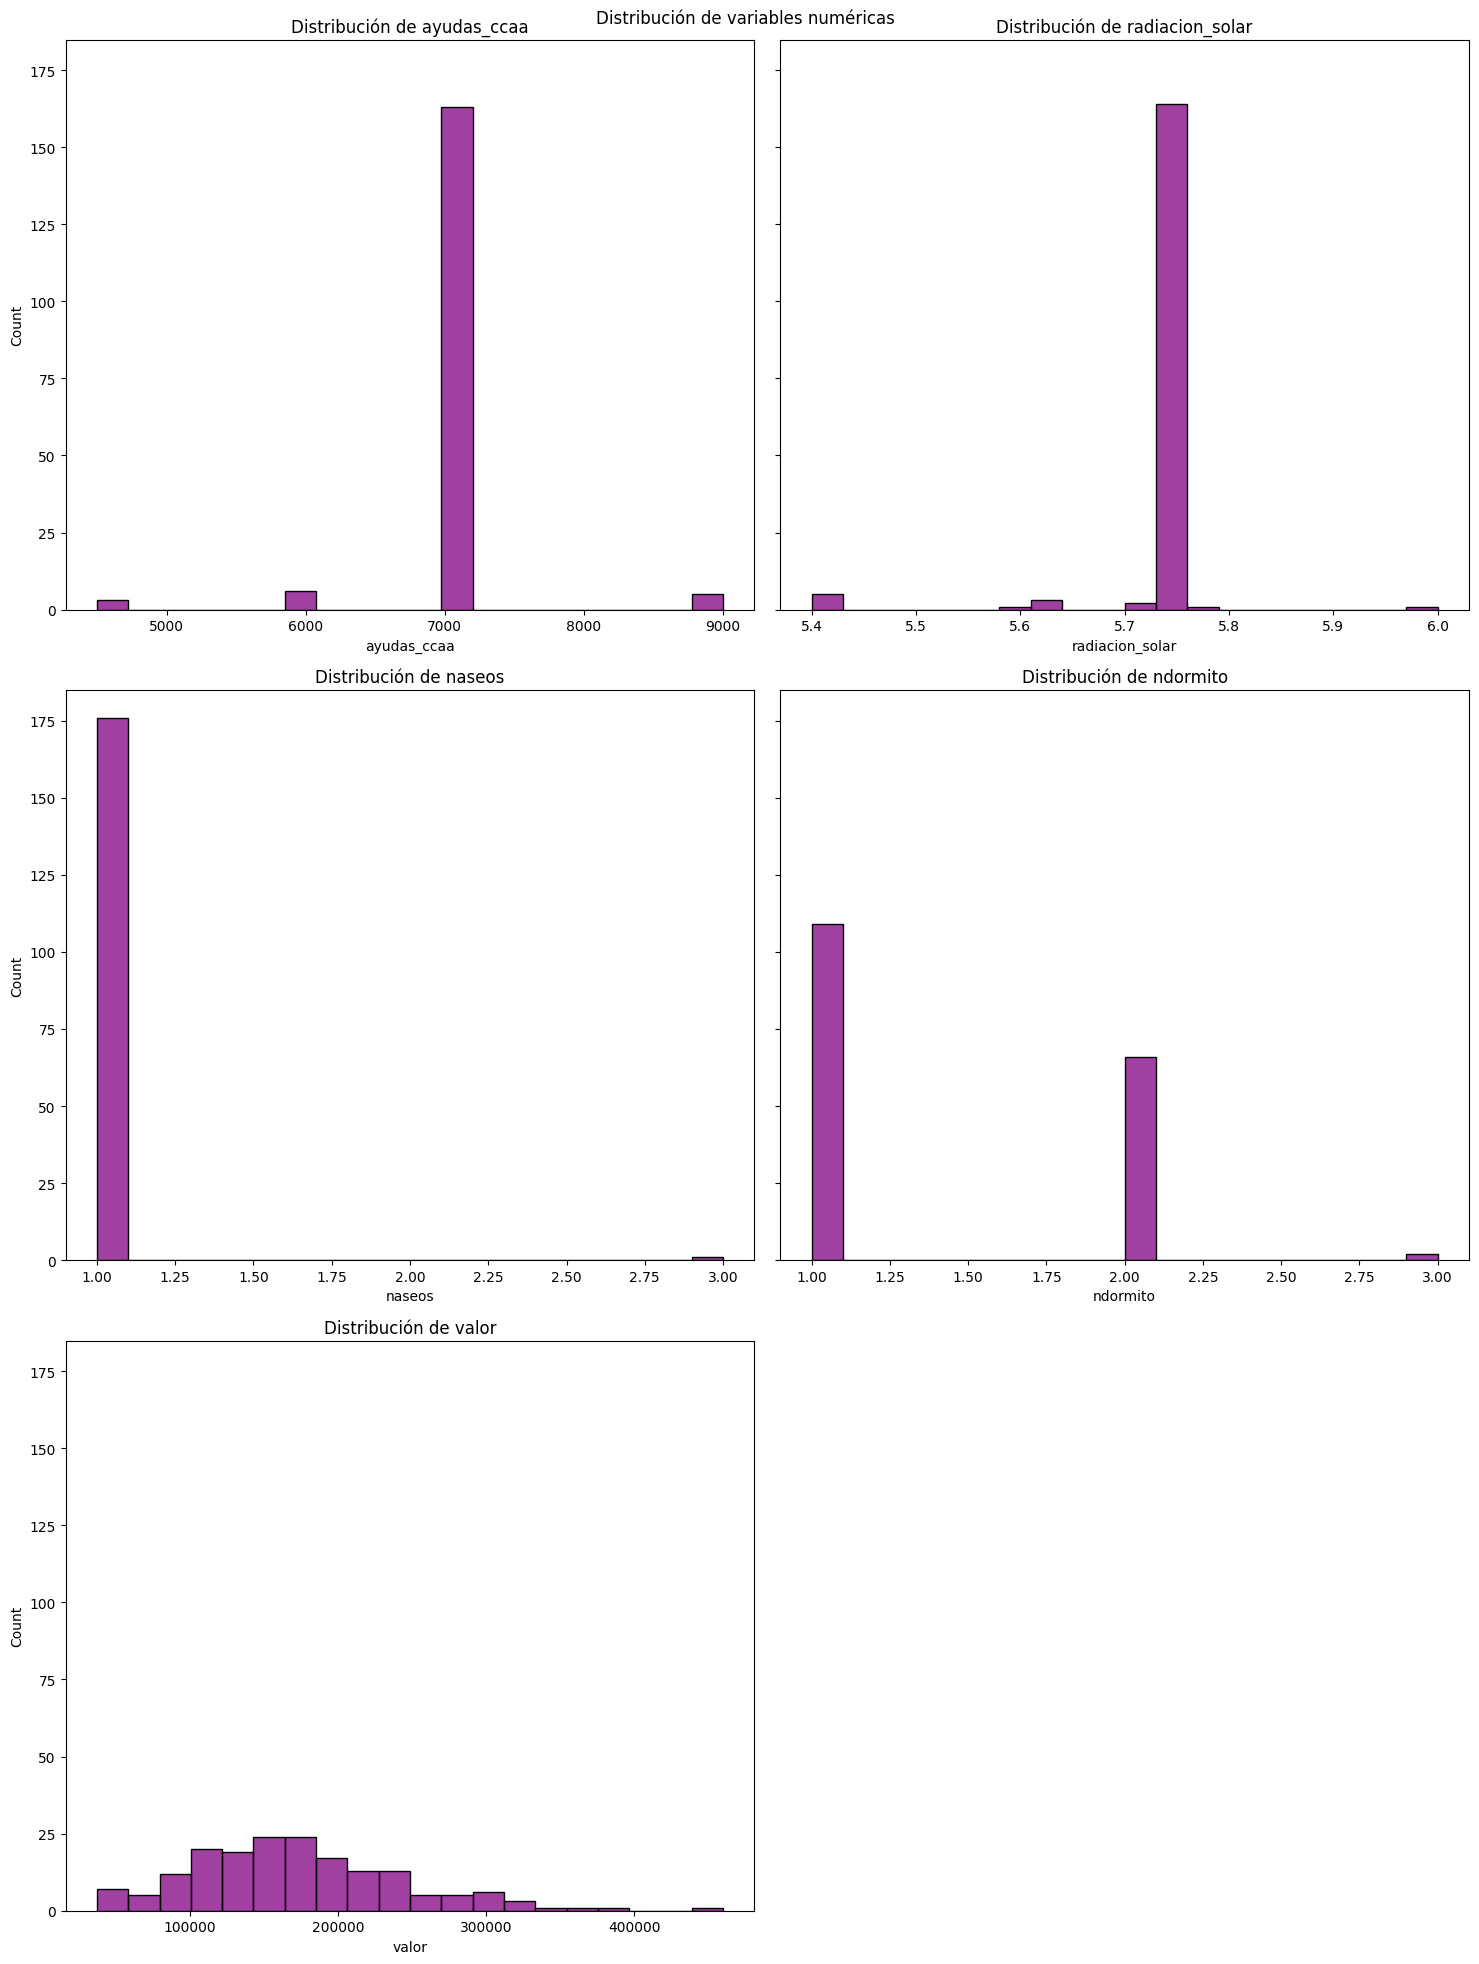

In [109]:
visualizador=f.Visualizador(df_pequeñas)
visualizador.plot_numericas(color="purple", tamano_grafica=(15, 20))

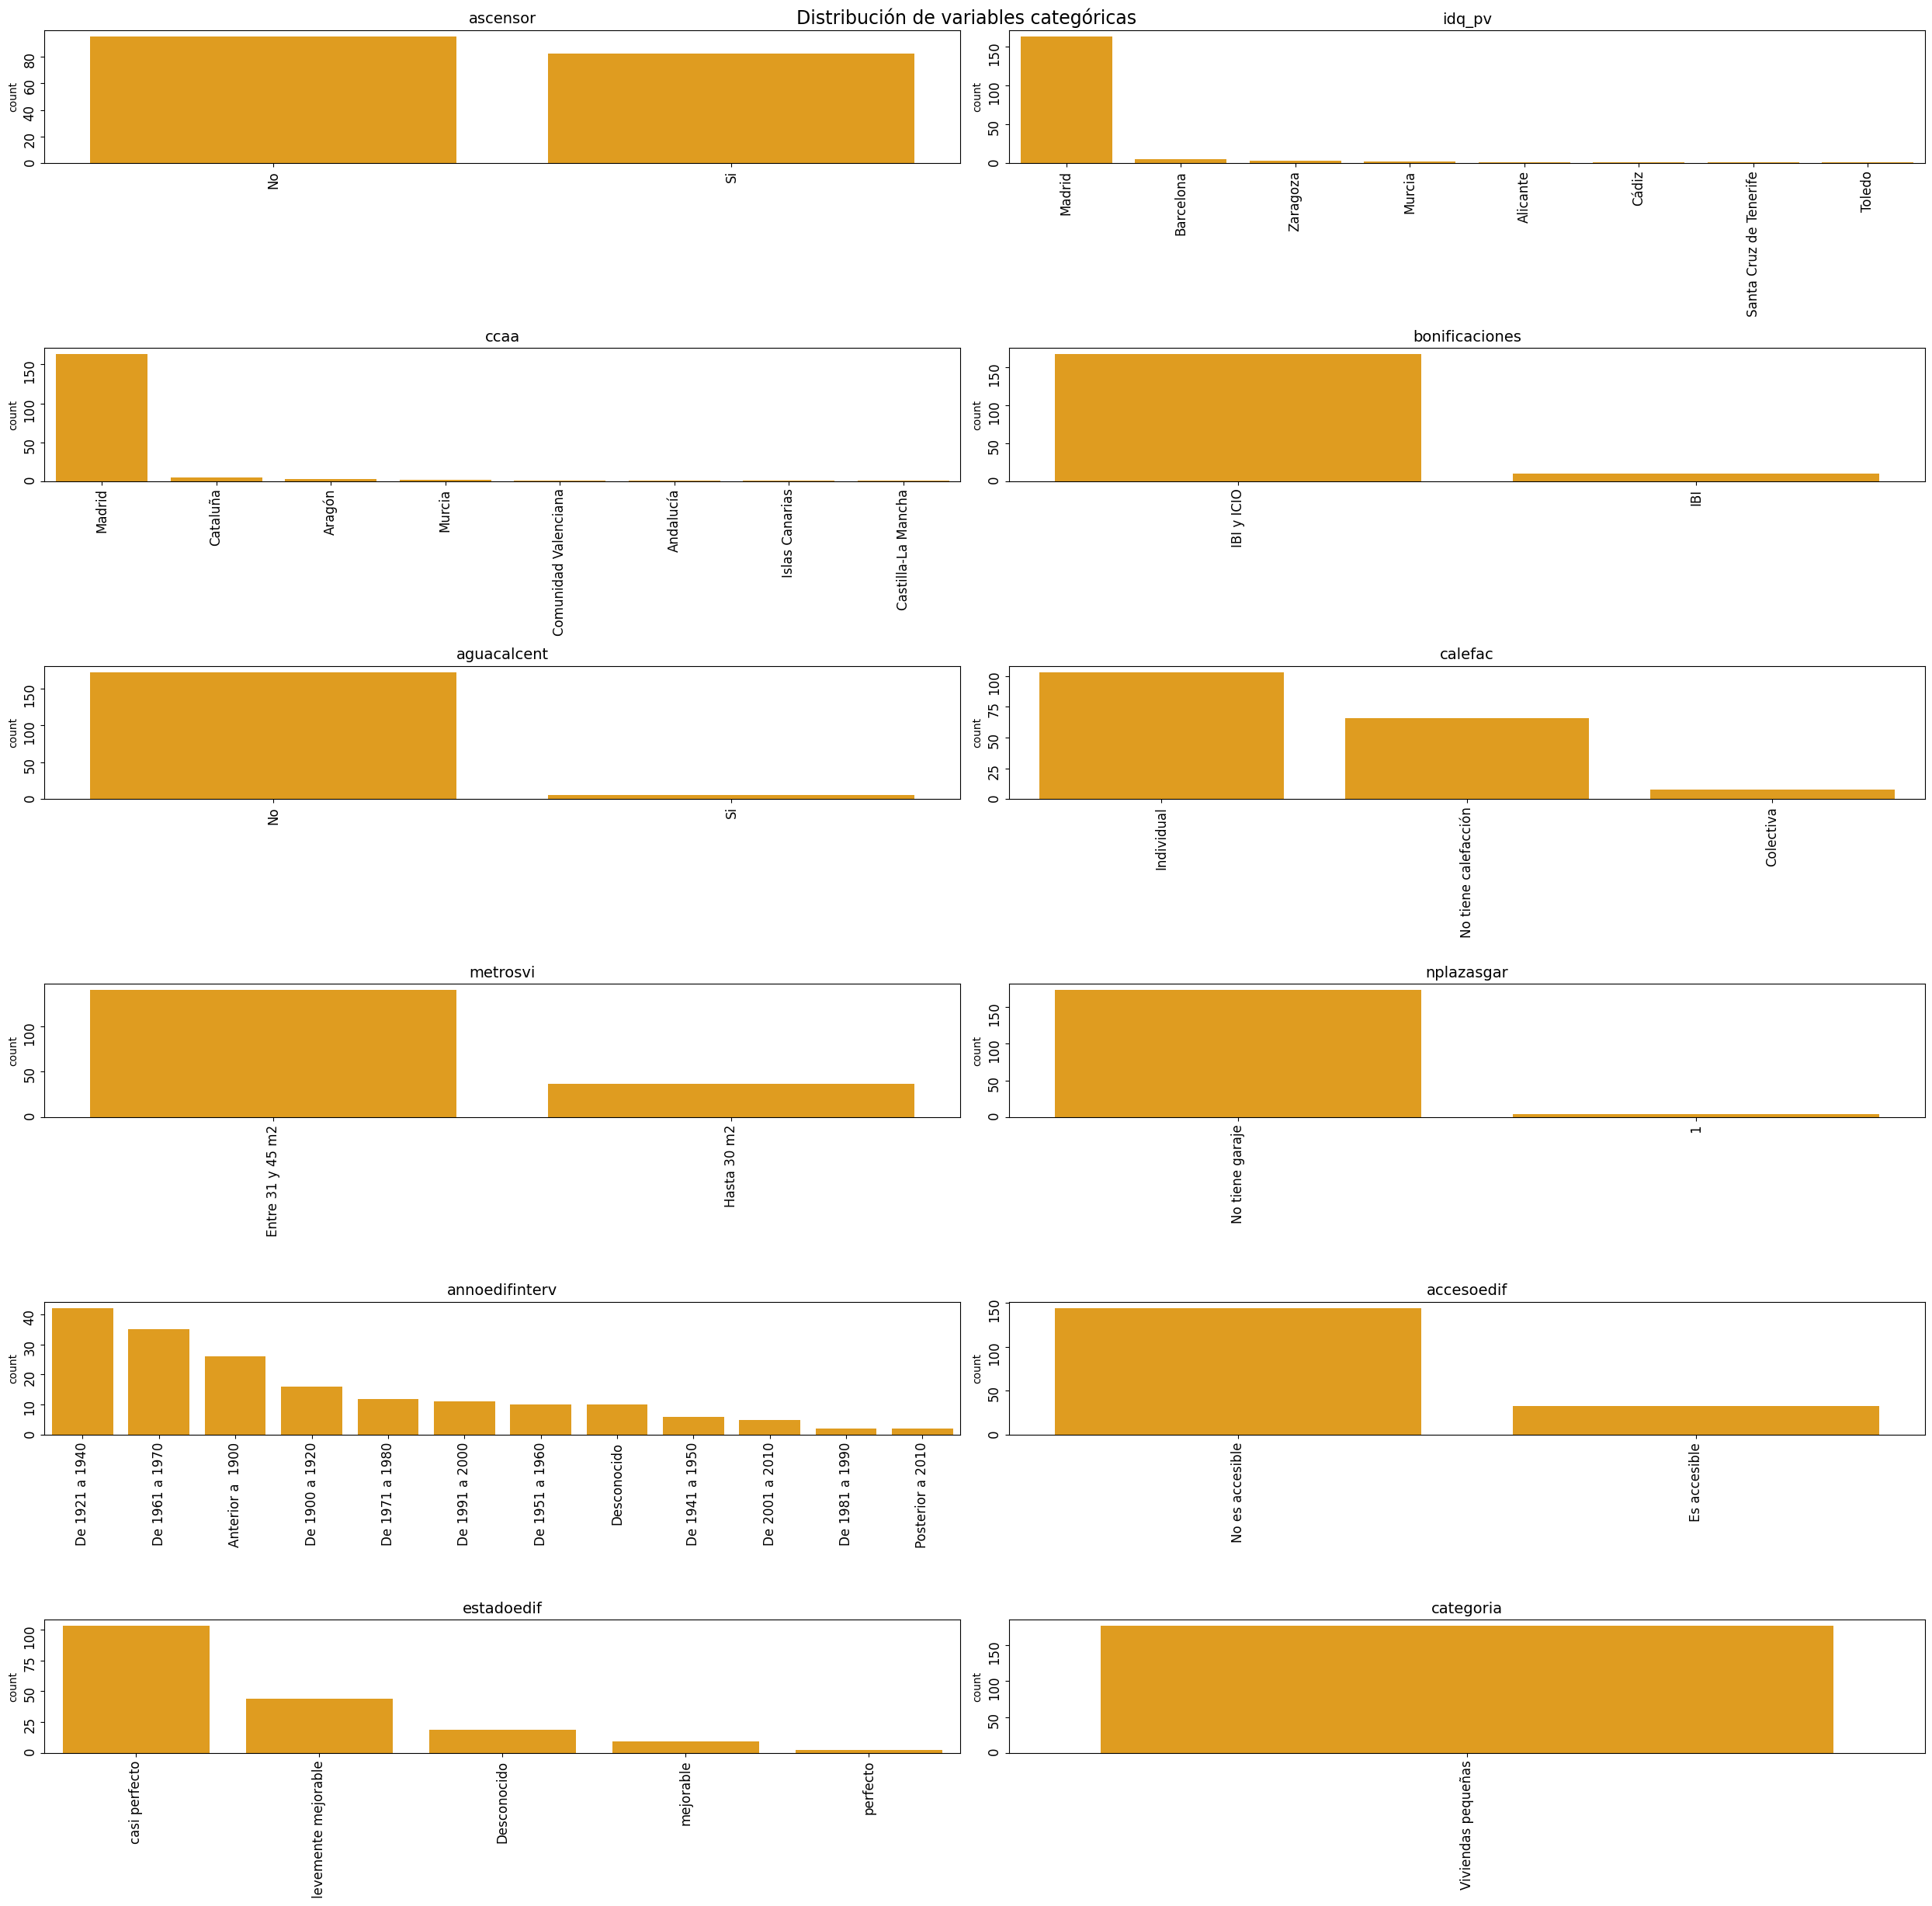

In [110]:
#Variables categóricas
visualizador.plot_categoricas( color="orange", tamanio_grafica=(25, 25), tamanio_fuente=12)

VEO LOS OUTLIERS (univariados) que ya son justificados y totalmente razonables

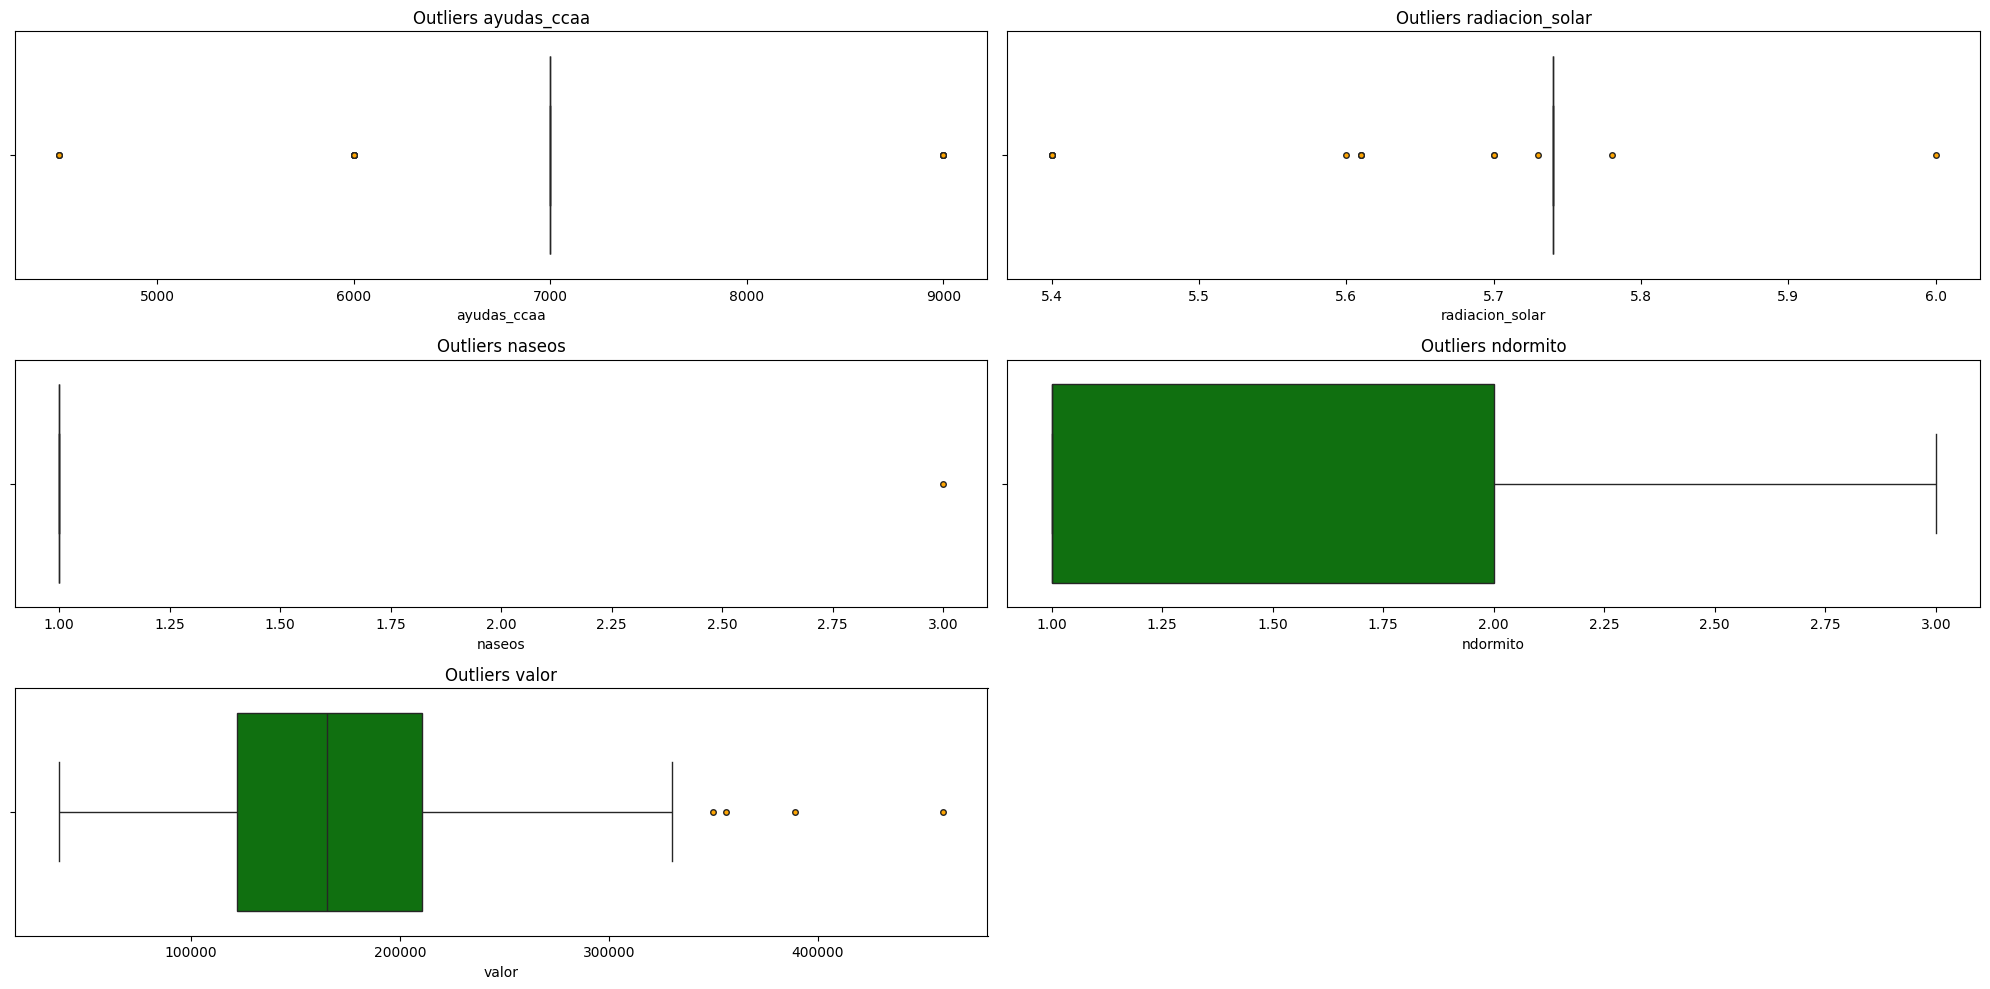

In [111]:
visualizador.deteccion_outliers(color="green")

VEO LAS CORRELACIONES

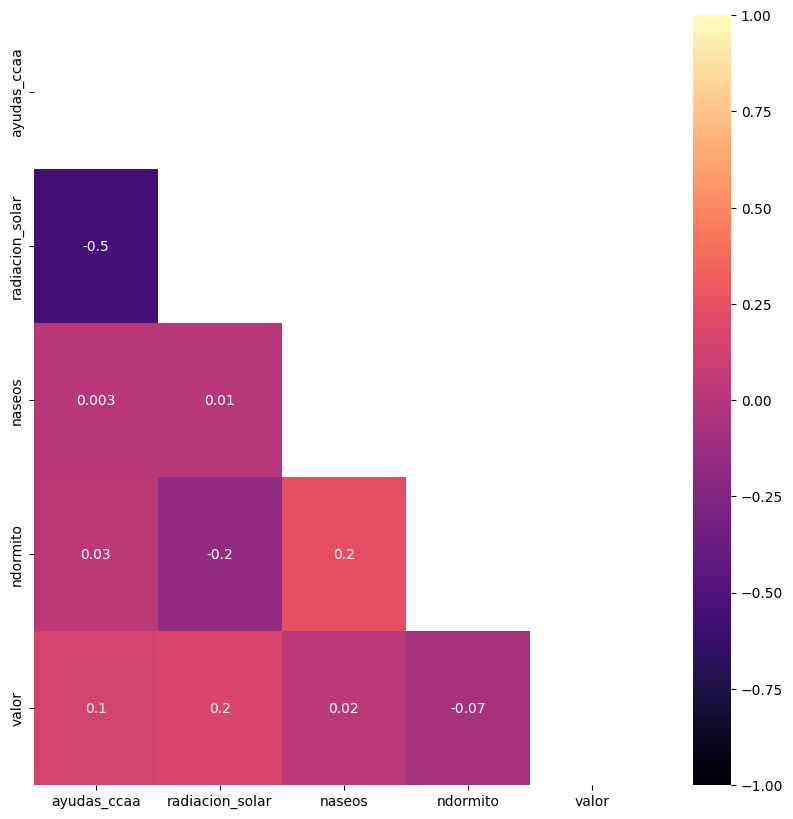

In [112]:
visualizador.correlacion(tamano_grafica=(10,10))

## FORMATEOS

In [114]:
df_pequeñas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 76 to 3823
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ascensor         177 non-null    object 
 1   idq_pv           177 non-null    object 
 2   ccaa             177 non-null    object 
 3   ayudas_ccaa      177 non-null    int64  
 4   bonificaciones   177 non-null    object 
 5   radiacion_solar  177 non-null    float64
 6   aguacalcent      177 non-null    object 
 7   calefac          177 non-null    object 
 8   metrosvi         177 non-null    object 
 9   naseos           177 non-null    int64  
 10  ndormito         177 non-null    int64  
 11  valor            177 non-null    int64  
 12  nplazasgar       177 non-null    object 
 13  annoedifinterv   177 non-null    object 
 14  accesoedif       177 non-null    object 
 15  estadoedif       177 non-null    object 
 16  categoria        177 non-null    object 
dtypes: float64(1), int6

In [115]:
columnas_a_formatear = ["naseos", "ndormito"]                      #columnas a formatear a tipo "O"

df_pequeñas[columnas_a_formatear] = df_pequeñas[columnas_a_formatear].astype("O")

In [116]:
df_pequeñas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, 76 to 3823
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ascensor         177 non-null    object 
 1   idq_pv           177 non-null    object 
 2   ccaa             177 non-null    object 
 3   ayudas_ccaa      177 non-null    int64  
 4   bonificaciones   177 non-null    object 
 5   radiacion_solar  177 non-null    float64
 6   aguacalcent      177 non-null    object 
 7   calefac          177 non-null    object 
 8   metrosvi         177 non-null    object 
 9   naseos           177 non-null    object 
 10  ndormito         177 non-null    object 
 11  valor            177 non-null    int64  
 12  nplazasgar       177 non-null    object 
 13  annoedifinterv   177 non-null    object 
 14  accesoedif       177 non-null    object 
 15  estadoedif       177 non-null    object 
 16  categoria        177 non-null    object 
dtypes: float64(1), int6

# **DETECCIÓN DE OUTLIERS USANDO ISOLATION FOREST (IF)**

In [117]:
outliers=d.GestionOutliersMultivariados(df_pequeñas)
df_outpeque=outliers.detectar_outliers_if(0.01)

In [118]:
df_outpeque.head()

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif,categoria,outlier
76,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 31 y 45 m2,1,1,209440,No tiene garaje,De 1971 a 1980,Es accesible,casi perfecto,Viviendas pequeñas,1
91,No,Barcelona,Cataluña,9000,IBI,5.40,No,No tiene calefacción,Hasta 30 m2,1,2,89000,No tiene garaje,Anterior a 1900,No es accesible,levemente mejorable,Viviendas pequeñas,1
92,No,Barcelona,Cataluña,9000,IBI,5.40,No,No tiene calefacción,Entre 31 y 45 m2,1,2,100000,No tiene garaje,De 1951 a 1960,No es accesible,casi perfecto,Viviendas pequeñas,1
93,No,Barcelona,Cataluña,9000,IBI,5.40,No,No tiene calefacción,Entre 31 y 45 m2,1,2,130000,No tiene garaje,De 1921 a 1940,No es accesible,casi perfecto,Viviendas pequeñas,1
101,Si,Barcelona,Cataluña,9000,IBI,5.40,No,Individual,Entre 31 y 45 m2,1,1,240000,No tiene garaje,De 1991 a 2000,No es accesible,casi perfecto,Viviendas pequeñas,-1


In [119]:
df_outpeque[df_outpeque["outlier"]==-1].shape[0]

2

In [120]:
df_outpeque[df_outpeque["outlier"]==-1]

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif,categoria,outlier
101,Si,Barcelona,Cataluña,9000,IBI,5.4,No,Individual,Entre 31 y 45 m2,1,1,240000,No tiene garaje,De 1991 a 2000,No es accesible,casi perfecto,Viviendas pequeñas,-1
178,No,Cádiz,Andalucía,6000,IBI y ICIO,6.0,No,No tiene calefacción,Hasta 30 m2,1,1,124800,No tiene garaje,De 1961 a 1970,No es accesible,mejorable,Viviendas pequeñas,-1


Filtramos por los que no son outliers

In [121]:
df_sin_outpequeñas=df_outpeque[df_outpeque["outlier"]!=-1]

In [122]:
df_sin_outpequeñas.shape[0]

175

In [123]:
df_sin_outpequeñas.drop(columns=["outlier", "categoria"], inplace=True)

In [124]:
df_sin_outpequeñas.reset_index(drop=True, inplace=True)

In [125]:
df_sin_outpequeñas.head()

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif
0,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 31 y 45 m2,1,1,209440,No tiene garaje,De 1971 a 1980,Es accesible,casi perfecto
1,No,Barcelona,Cataluña,9000,IBI,5.40,No,No tiene calefacción,Hasta 30 m2,1,2,89000,No tiene garaje,Anterior a 1900,No es accesible,levemente mejorable
2,No,Barcelona,Cataluña,9000,IBI,5.40,No,No tiene calefacción,Entre 31 y 45 m2,1,2,100000,No tiene garaje,De 1951 a 1960,No es accesible,casi perfecto
3,No,Barcelona,Cataluña,9000,IBI,5.40,No,No tiene calefacción,Entre 31 y 45 m2,1,2,130000,No tiene garaje,De 1921 a 1940,No es accesible,casi perfecto
4,No,Barcelona,Cataluña,9000,IBI,5.40,No,No tiene calefacción,Hasta 30 m2,1,2,68000,No tiene garaje,De 1921 a 1940,No es accesible,levemente mejorable


In [126]:
df_sin_outpequeñas.to_pickle("../datos/red_piso/Datos_formateados/pequeñas_formateadas.pkl")

# **VIVIENDAS MEDIANAS**

In [127]:
df_medianas.head()

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif,categoria
3,No,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,Individual,Entre 46 y 60 m2,1,1,85000,No tiene garaje,De 1971 a 1980,Es accesible,casi perfecto,Viviendas medianas
4,No,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,Individual,Entre 61 y 75 m2,1,3,105000,No tiene garaje,De 1961 a 1970,No es accesible,casi perfecto,Viviendas medianas
8,No,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,Individual,Entre 76 y 90 m2,2,4,168000,1,De 1991 a 2000,No es accesible,casi perfecto,Viviendas medianas
11,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,Individual,Entre 76 y 90 m2,1,2,199000,1,De 1991 a 2000,Es accesible,Desconocido,Viviendas medianas
13,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 76 y 90 m2,1,2,239900,1,De 2001 a 2010,Es accesible,casi perfecto,Viviendas medianas


# **EDA**

In [128]:
f.exploracion_dataframe(df_medianas,"valor")

El número de datos es 1916 y el de columnas es 17

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 32

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
ascensor,object
idq_pv,object
ccaa,object
ayudas_ccaa,int64
bonificaciones,object
radiacion_solar,float64
aguacalcent,object
calefac,object
metrosvi,object
naseos,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna ASCENSOR tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
ascensor,
Si,1080
No,836


La columna IDQ_PV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 17 categorías (5/17)


,count
idq_pv,
Madrid,1490
Zaragoza,69
Guadalajara,56
Murcia,51
Cádiz,44


La columna CCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


,count
ccaa,
Madrid,1490
Castilla-La Mancha,84
Andalucía,80
Comunidad Valenciana,76
Aragón,69


La columna BONIFICACIONES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
bonificaciones,
IBI y ICIO,1756
IBI,160


La columna AGUACALCENT tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
aguacalcent,
No,1787
Si,129


La columna CALEFAC tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
calefac,
Individual,1227
No tiene calefacción,498
Colectiva,191


La columna METROSVI tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
metrosvi,
Entre 76 y 90 m2,793
Entre 61 y 75 m2,700
Entre 46 y 60 m2,423


La columna NPLAZASGAR tiene los siguientes valores únicos:
Mostrando 4 categorías con más valores del total de 4 categorías (4/4)


,count
nplazasgar,
No tiene garaje,1615
1,269
2,30
De 3 a 5,2


La columna ANNOEDIFINTERV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 12 categorías (5/12)


,count
annoedifinterv,
De 1961 a 1970,634
De 1971 a 1980,421
De 2001 a 2010,179
De 1951 a 1960,178
De 1991 a 2000,132


La columna ACCESOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
accesoedif,
No es accesible,1394
Es accesible,522


La columna ESTADOEDIF tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 5 categorías (5/5)


,count
estadoedif,
casi perfecto,1120
levemente mejorable,346
Desconocido,332
mejorable,111
perfecto,7


La columna CATEGORIA tiene los siguientes valores únicos:
Mostrando 1 categorías con más valores del total de 1 categorías (1/1)


,count
categoria,
Viviendas medianas,1916



----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
ayudas_ccaa,1916.0,6683.455115,824.122455,3000.00,7000.00,7000.00,7000.00,9000.0
radiacion_solar,1916.0,5.729462,0.086215,5.02,5.74,5.74,5.74,6.0
naseos,1916.0,1.143528,0.359525,1.00,1.00,1.00,1.00,3.0
ndormito,1916.0,2.464509,0.697847,1.00,2.00,3.00,3.00,6.0
valor,1916.0,194246.904489,90427.878881,185.00,137500.00,175000.00,229980.00,795000.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
ascensor,1916,2,Si,1080
idq_pv,1916,17,Madrid,1490
ccaa,1916,9,Madrid,1490
bonificaciones,1916,2,IBI y ICIO,1756
aguacalcent,1916,2,No,1787
calefac,1916,3,Individual,1227
metrosvi,1916,3,Entre 76 y 90 m2,793
nplazasgar,1916,4,No tiene garaje,1615
annoedifinterv,1916,12,De 1961 a 1970,634
accesoedif,1916,2,No es accesible,1394



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 1916 entries, 3 to 3883
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ascensor         1916 non-null   object 
 1   idq_pv           1916 non-null   object 
 2   ccaa             1916 non-null   object 
 3   ayudas_ccaa      1916 non-null   int64  
 4   bonificaciones   1916 non-null   object 
 5   radiacion_solar  1916 non-null   float64
 6   aguacalcent      1916 non-null   object 
 7   calefac          1916 non-null   object 
 8   metrosvi         1916 non-null   object 
 9   naseos           1916 non-null   int64  
 10  ndormito         1916 non-null   int64  
 11  valor            1916 non-null   int64  
 12  nplazasgar       1916 non-null   object 
 13  annoedifinterv   1916 non-null   object 
 14  accesoedif       1916 non-null   object 
 15  estadoedif       1916 non-null   object 
 16  c

None

Lo que he podido ver hasta el momento es que a simple vista no parece haber muchos outliers ya que se distorsiona muy levemente la media. Si eso se aprecia un sesgo en la media del valor de la vivienda debido a las viviendas más caras con respecto a la moda.

In [129]:
df_medianas["metrosvi"].unique()

array(['Entre 46 y 60 m2', 'Entre 61 y 75 m2', 'Entre 76 y 90 m2'],
      dtype=object)

In [130]:
df_medianas["ndormito"].value_counts() #observamos que en las viendas medianas el numero de habitaciones es coherente

ndormito
3    970
2    725
1    175
4     44
5      1
6      1
Name: count, dtype: int64

***Observamos el estado de las viviendas por si vemos algo raro***

In [132]:
df_medianas["estadoedif"].value_counts()

estadoedif
casi perfecto          1120
levemente mejorable     346
Desconocido             332
mejorable               111
perfecto                  7
Name: count, dtype: int64

In [133]:
df_medianas["naseos"].value_counts() #observamos que en las viendas medianas el numero de aseos es coherente

naseos
1    1647
2     263
3       6
Name: count, dtype: int64

VEO LA DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS

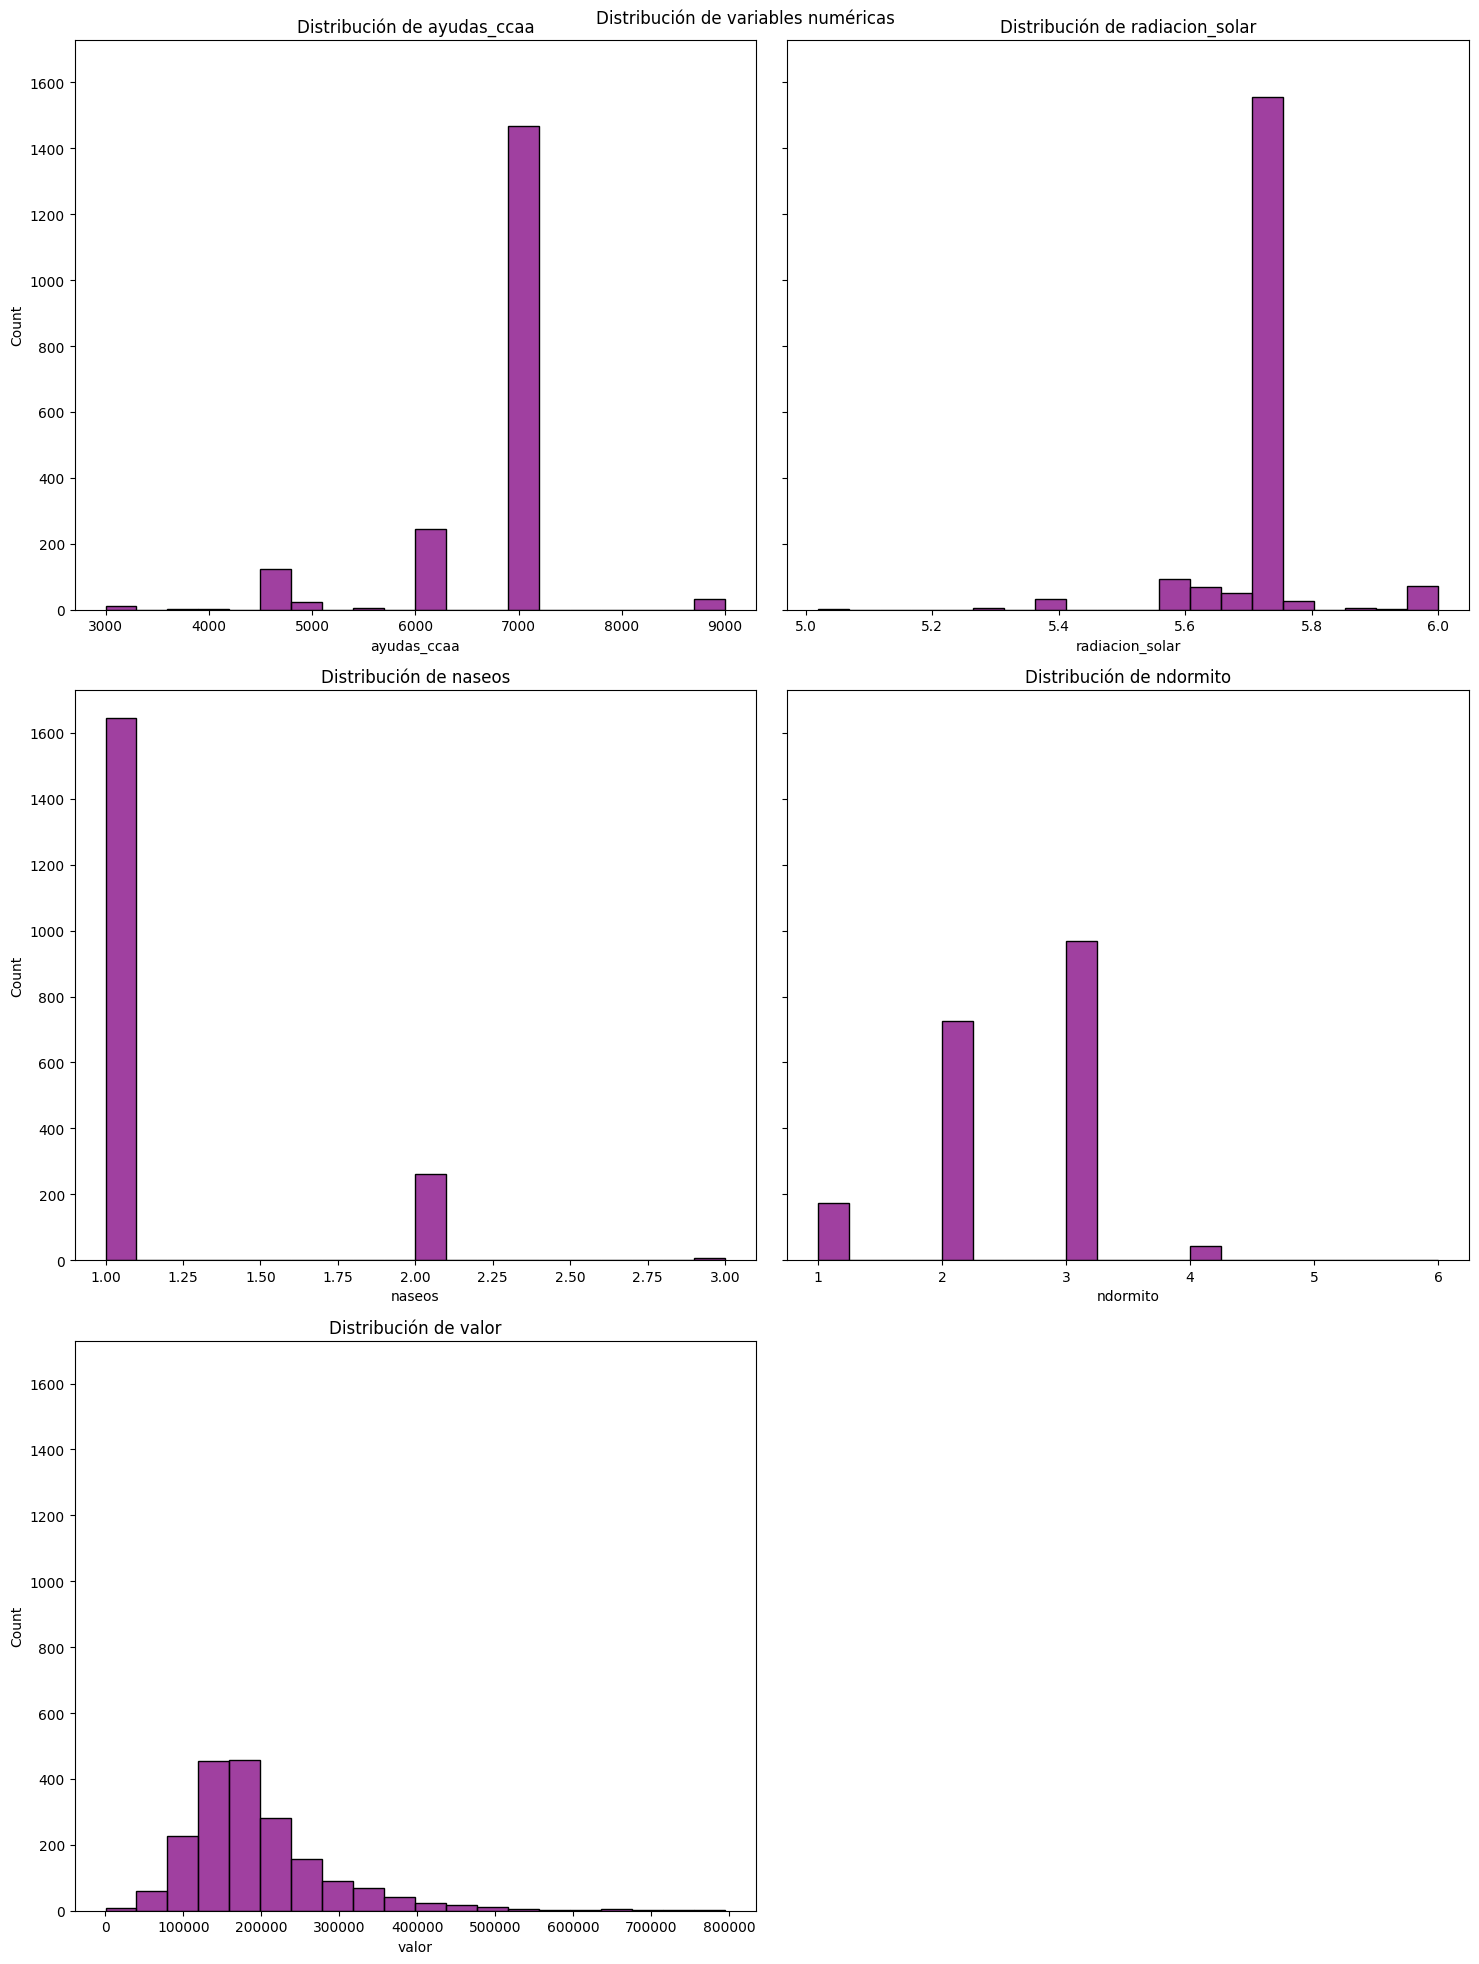

In [134]:
visualizador=f.Visualizador(df_medianas)
visualizador.plot_numericas(color="purple", tamano_grafica=(15, 20))

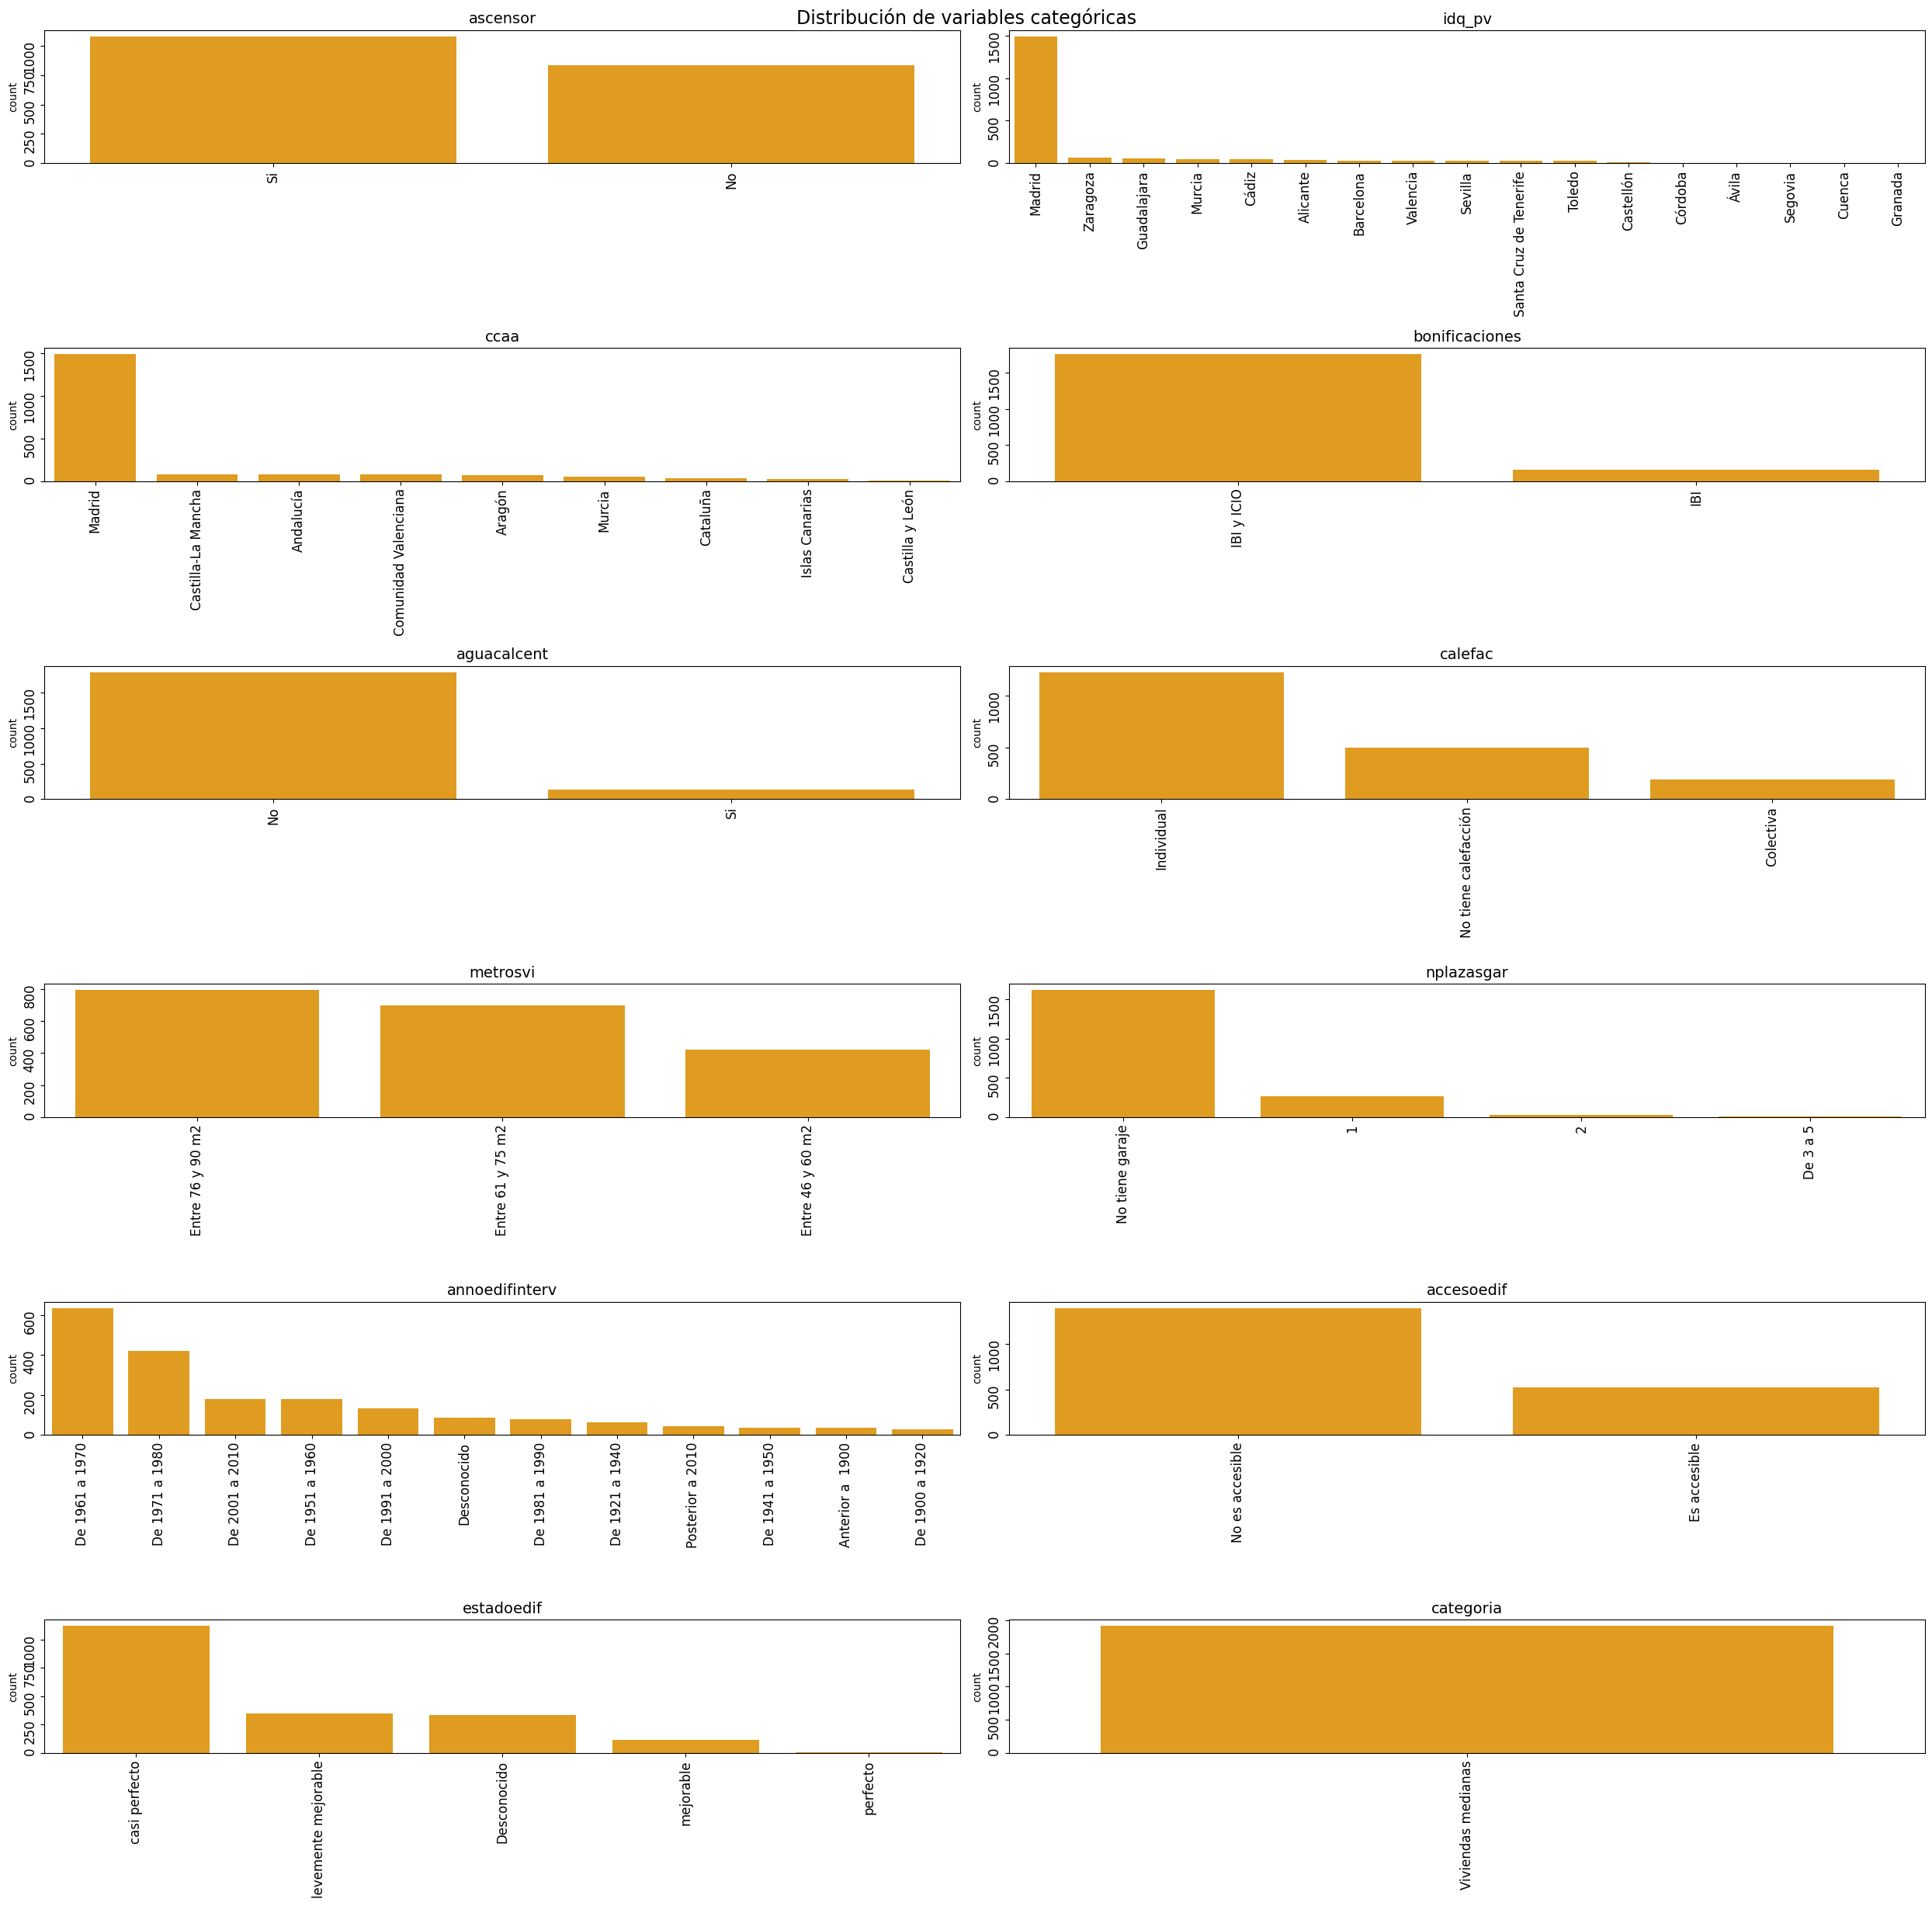

In [135]:
#Variables categóricas
visualizador.plot_categoricas( color="orange", tamanio_grafica=(25, 25), tamanio_fuente=12)

VEO LOS OUTLIERS (univariados) que ya son justificados y totalmente razonables

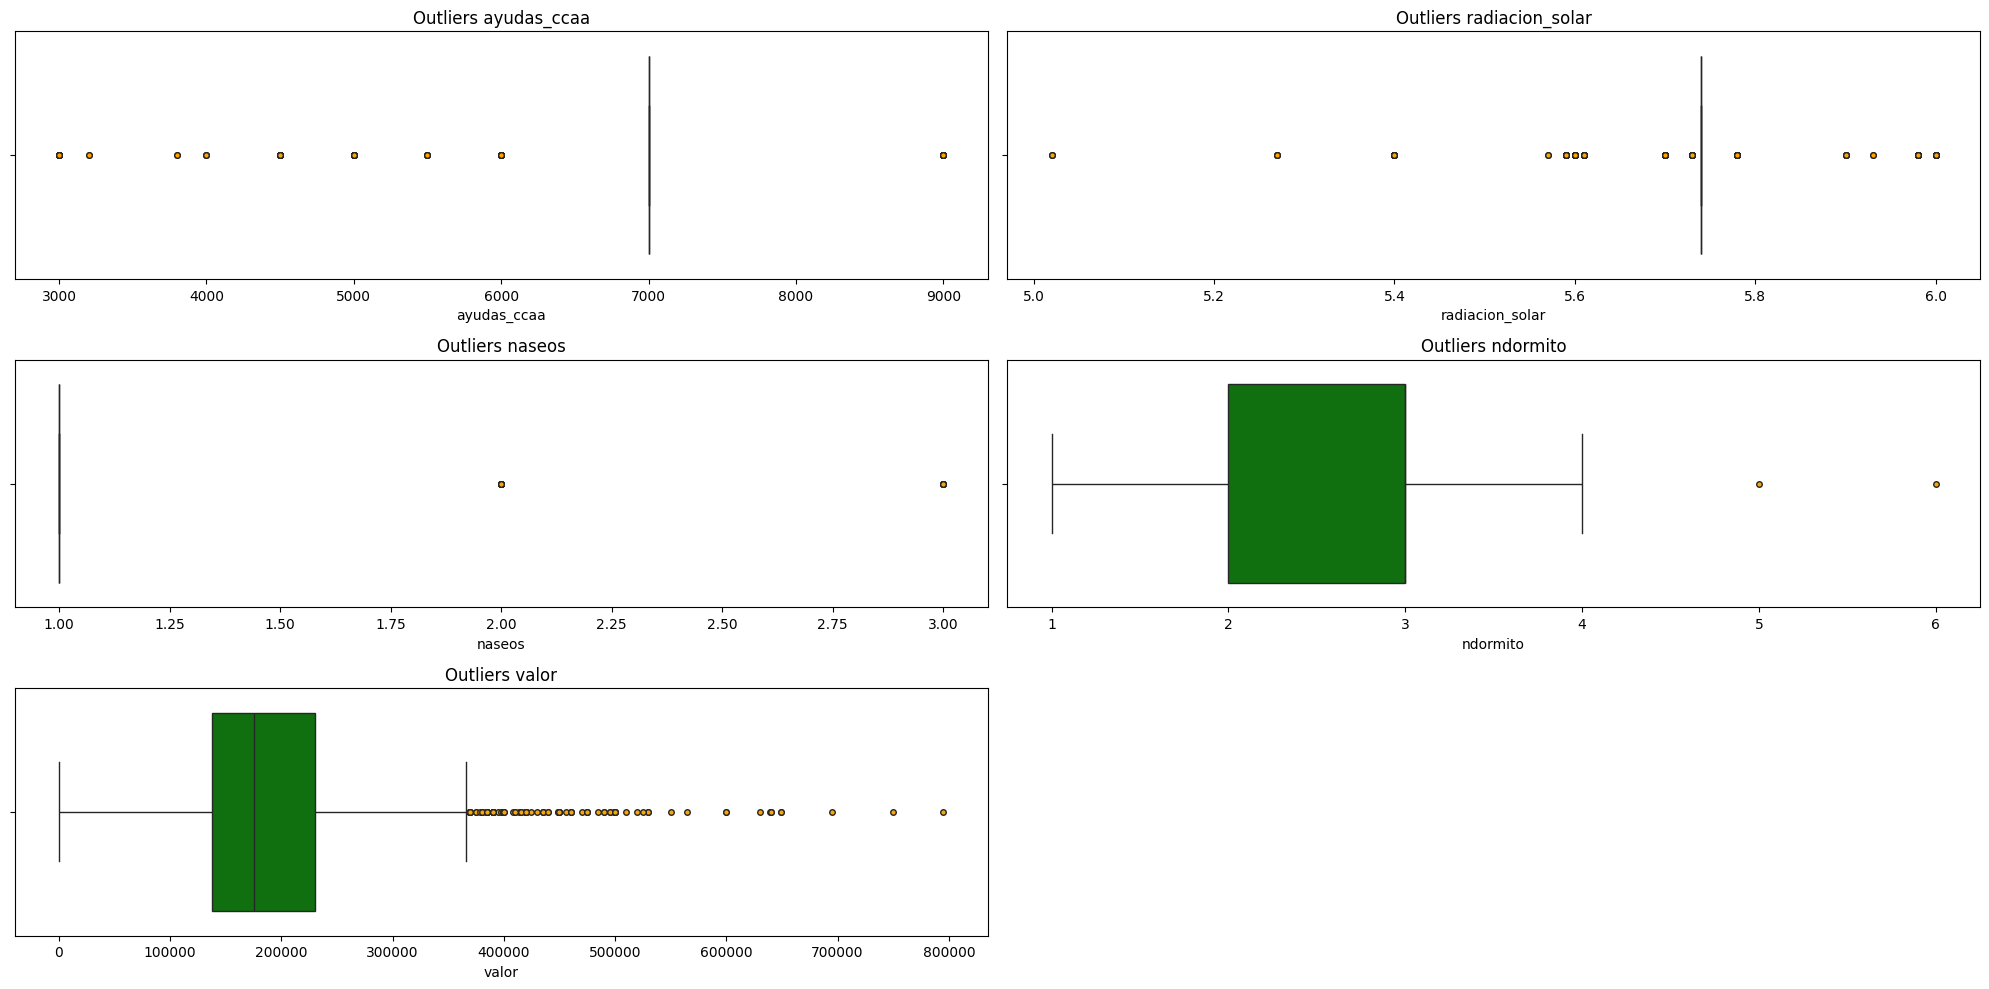

In [136]:
visualizador.deteccion_outliers(color="green")

VEO LAS CORRELACIONES

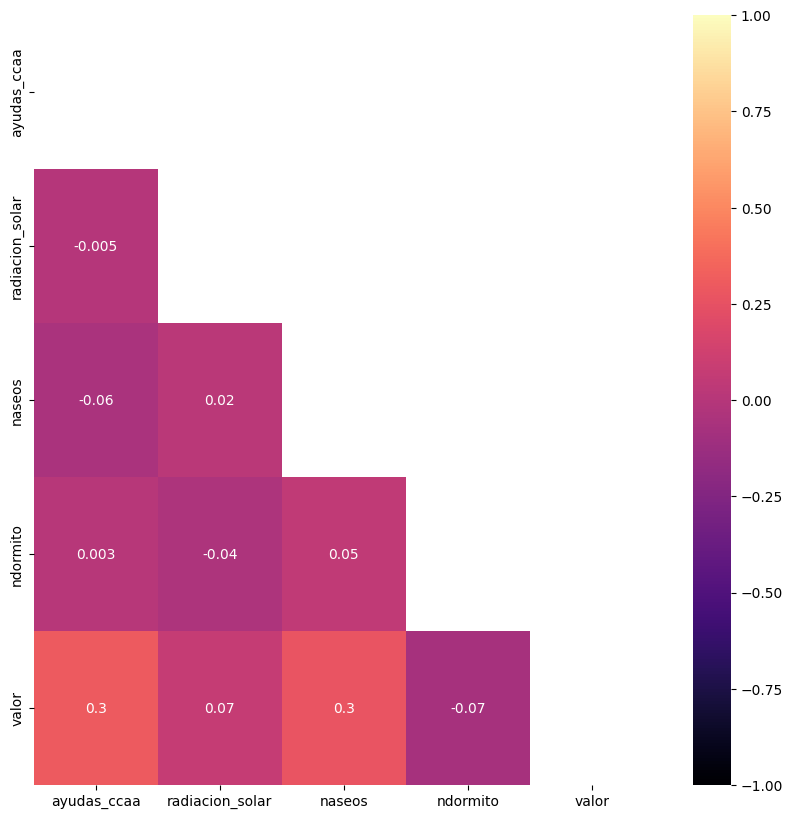

In [137]:
visualizador.correlacion(tamano_grafica=(10,10))

## FORMATEOS

In [139]:
df_medianas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1916 entries, 3 to 3883
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ascensor         1916 non-null   object 
 1   idq_pv           1916 non-null   object 
 2   ccaa             1916 non-null   object 
 3   ayudas_ccaa      1916 non-null   int64  
 4   bonificaciones   1916 non-null   object 
 5   radiacion_solar  1916 non-null   float64
 6   aguacalcent      1916 non-null   object 
 7   calefac          1916 non-null   object 
 8   metrosvi         1916 non-null   object 
 9   naseos           1916 non-null   int64  
 10  ndormito         1916 non-null   int64  
 11  valor            1916 non-null   int64  
 12  nplazasgar       1916 non-null   object 
 13  annoedifinterv   1916 non-null   object 
 14  accesoedif       1916 non-null   object 
 15  estadoedif       1916 non-null   object 
 16  categoria        1916 non-null   object 
dtypes: float64(1), int6

In [140]:
columnas_a_formatear = ["naseos", "ndormito"]                      #columnas a formatear a tipo "O"

df_medianas[columnas_a_formatear] = df_medianas[columnas_a_formatear].astype("O")

In [141]:
df_medianas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1916 entries, 3 to 3883
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ascensor         1916 non-null   object 
 1   idq_pv           1916 non-null   object 
 2   ccaa             1916 non-null   object 
 3   ayudas_ccaa      1916 non-null   int64  
 4   bonificaciones   1916 non-null   object 
 5   radiacion_solar  1916 non-null   float64
 6   aguacalcent      1916 non-null   object 
 7   calefac          1916 non-null   object 
 8   metrosvi         1916 non-null   object 
 9   naseos           1916 non-null   object 
 10  ndormito         1916 non-null   object 
 11  valor            1916 non-null   int64  
 12  nplazasgar       1916 non-null   object 
 13  annoedifinterv   1916 non-null   object 
 14  accesoedif       1916 non-null   object 
 15  estadoedif       1916 non-null   object 
 16  categoria        1916 non-null   object 
dtypes: float64(1), int6

# **DETECCIÓN DE OUTLIERS USANDO ISOLATION FOREST (IF)**

In [142]:
outliers=d.GestionOutliersMultivariados(df_medianas)
df_outmed=outliers.detectar_outliers_if(0.01)

In [143]:
df_outmed.head()

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif,categoria,outlier
3,No,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,Individual,Entre 46 y 60 m2,1,1,85000,No tiene garaje,De 1971 a 1980,Es accesible,casi perfecto,Viviendas medianas,1
4,No,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,Individual,Entre 61 y 75 m2,1,3,105000,No tiene garaje,De 1961 a 1970,No es accesible,casi perfecto,Viviendas medianas,1
8,No,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,Individual,Entre 76 y 90 m2,2,4,168000,1,De 1991 a 2000,No es accesible,casi perfecto,Viviendas medianas,1
11,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,Individual,Entre 76 y 90 m2,1,2,199000,1,De 1991 a 2000,Es accesible,Desconocido,Viviendas medianas,1
13,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 76 y 90 m2,1,2,239900,1,De 2001 a 2010,Es accesible,casi perfecto,Viviendas medianas,1


In [144]:
df_outmed[df_outmed["outlier"]==-1].shape[0]

20

In [145]:
df_outmed[df_outmed["outlier"]==-1]

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif,categoria,outlier
88,No,Ávila,Castilla y León,3800,IBI,5.27,No,Individual,Entre 76 y 90 m2,1,4,175000,No tiene garaje,De 2001 a 2010,No es accesible,Desconocido,Viviendas medianas,-1
90,No,Ávila,Castilla y León,3800,IBI,5.27,No,Individual,Entre 76 y 90 m2,1,2,170000,1,De 1971 a 1980,No es accesible,casi perfecto,Viviendas medianas,-1
103,Si,Barcelona,Cataluña,9000,IBI,5.40,No,Individual,Entre 61 y 75 m2,1,3,280000,No tiene garaje,De 1961 a 1970,Es accesible,casi perfecto,Viviendas medianas,-1
104,No,Barcelona,Cataluña,9000,IBI,5.40,No,Individual,Entre 61 y 75 m2,1,2,299000,No tiene garaje,De 1900 a 1920,No es accesible,casi perfecto,Viviendas medianas,-1
105,Si,Barcelona,Cataluña,9000,IBI,5.40,No,No tiene calefacción,Entre 61 y 75 m2,1,3,330000,No tiene garaje,De 1971 a 1980,Es accesible,casi perfecto,Viviendas medianas,-1
106,Si,Barcelona,Cataluña,9000,IBI,5.40,No,Individual,Entre 76 y 90 m2,1,4,350000,No tiene garaje,De 1951 a 1960,Es accesible,casi perfecto,Viviendas medianas,-1
108,Si,Barcelona,Cataluña,9000,IBI,5.40,Si,Individual,Entre 76 y 90 m2,2,4,365000,No tiene garaje,De 2001 a 2010,No es accesible,casi perfecto,Viviendas medianas,-1
109,Si,Barcelona,Cataluña,9000,IBI,5.40,No,Individual,Entre 61 y 75 m2,1,3,370000,No tiene garaje,De 1961 a 1970,No es accesible,casi perfecto,Viviendas medianas,-1
110,Si,Barcelona,Cataluña,9000,IBI,5.40,No,No tiene calefacción,Entre 76 y 90 m2,1,3,370000,No tiene garaje,De 1941 a 1950,No es accesible,levemente mejorable,Viviendas medianas,-1
111,Si,Barcelona,Cataluña,9000,IBI,5.40,No,Individual,Entre 76 y 90 m2,1,2,380000,No tiene garaje,De 1981 a 1990,No es accesible,Desconocido,Viviendas medianas,-1


Filtramos por los que no son outliers

In [146]:
df_sin_outmedianas=df_outmed[df_outmed["outlier"]!=-1]

In [147]:
df_sin_outmedianas.shape[0]

1896

In [148]:
df_sin_outmedianas.drop(columns=["outlier", "categoria"], inplace=True)

In [149]:
df_sin_outmedianas.reset_index(drop=True, inplace=True)

In [150]:
df_sin_outmedianas.head()

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif
0,No,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,Individual,Entre 46 y 60 m2,1,1,85000,No tiene garaje,De 1971 a 1980,Es accesible,casi perfecto
1,No,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,Individual,Entre 61 y 75 m2,1,3,105000,No tiene garaje,De 1961 a 1970,No es accesible,casi perfecto
2,No,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,Individual,Entre 76 y 90 m2,2,4,168000,1,De 1991 a 2000,No es accesible,casi perfecto
3,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,Individual,Entre 76 y 90 m2,1,2,199000,1,De 1991 a 2000,Es accesible,Desconocido
4,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 76 y 90 m2,1,2,239900,1,De 2001 a 2010,Es accesible,casi perfecto


In [151]:
df_sin_outmedianas.to_pickle("../datos/red_piso/Datos_formateados/medianas_formateadas.pkl")

# **VIVIENDAS AMPLIAS**

In [152]:
df_amplias.head()

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif,categoria
0,Si,Albacete,Castilla-La Mancha,4500,IBI y ICIO,5.72,Si,Colectiva,Entre 121 y 150 m2,2,3,249000,No tiene garaje,De 1971 a 1980,Es accesible,Desconocido,Viviendas amplias
1,Si,Albacete,Castilla-La Mancha,4500,IBI y ICIO,5.72,No,Individual,Entre 121 y 150 m2,2,3,250000,1,De 1971 a 1980,Es accesible,Desconocido,Viviendas amplias
2,Si,Albacete,Castilla-La Mancha,4500,IBI y ICIO,5.72,No,Individual,Entre 91 y 105 m2,2,3,223600,No tiene garaje,De 1981 a 1990,Es accesible,casi perfecto,Viviendas amplias
5,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 91 y 105 m2,1,3,110000,No tiene garaje,De 1981 a 1990,Es accesible,casi perfecto,Viviendas amplias
6,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 106 y 120 m2,1,3,135000,No tiene garaje,Desconocido,No es accesible,Desconocido,Viviendas amplias


# **EDA**

In [153]:
f.exploracion_dataframe(df_amplias,"valor")

El número de datos es 1262 y el de columnas es 17

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 9

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
ascensor,object
idq_pv,object
ccaa,object
ayudas_ccaa,int64
bonificaciones,object
radiacion_solar,float64
aguacalcent,object
calefac,object
metrosvi,object
naseos,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna ASCENSOR tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
ascensor,
Si,950
No,312


La columna IDQ_PV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 21 categorías (5/21)


,count
idq_pv,
Madrid,873
Murcia,87
Guadalajara,54
Toledo,48
Alicante,34


La columna CCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 9 categorías (5/9)


,count
ccaa,
Madrid,873
Castilla-La Mancha,105
Murcia,87
Comunidad Valenciana,76
Andalucía,55


La columna BONIFICACIONES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
bonificaciones,
IBI y ICIO,1132
IBI,130


La columna AGUACALCENT tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
aguacalcent,
No,1128
Si,134


La columna CALEFAC tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
calefac,
Individual,769
No tiene calefacción,267
Colectiva,226


La columna METROSVI tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
metrosvi,
Entre 91 y 105 m2,542
Entre 106 y 120 m2,368
Entre 121 y 150 m2,352


La columna NPLAZASGAR tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 5 categorías (5/5)


,count
nplazasgar,
No tiene garaje,700
1,483
2,74
De 3 a 5,3
De 6 a 10,2


La columna ANNOEDIFINTERV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 12 categorías (5/12)


,count
annoedifinterv,
De 1971 a 1980,281
De 2001 a 2010,225
De 1991 a 2000,191
De 1981 a 1990,152
De 1961 a 1970,141


La columna ACCESOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
accesoedif,
No es accesible,731
Es accesible,531


La columna ESTADOEDIF tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 5 categorías (5/5)


,count
estadoedif,
casi perfecto,795
levemente mejorable,211
Desconocido,177
mejorable,67
perfecto,12


La columna CATEGORIA tiene los siguientes valores únicos:
Mostrando 1 categorías con más valores del total de 1 categorías (1/1)


,count
categoria,
Viviendas amplias,1262



----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
ayudas_ccaa,1262.0,6358.557845,1146.965301,3000.00,6000.00,7000.00,7000.00,9000.00
radiacion_solar,1262.0,5.728399,0.087766,5.02,5.74,5.74,5.74,6.02
naseos,1262.0,1.797940,0.503339,1.00,2.00,2.00,2.00,4.00
ndormito,1262.0,3.149762,0.698188,1.00,3.00,3.00,4.00,6.00
valor,1262.0,305752.851030,204692.100805,29900.00,177598.50,253950.00,364900.00,1890000.00



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
ascensor,1262,2,Si,950
idq_pv,1262,21,Madrid,873
ccaa,1262,9,Madrid,873
bonificaciones,1262,2,IBI y ICIO,1132
aguacalcent,1262,2,No,1128
calefac,1262,3,Individual,769
metrosvi,1262,3,Entre 91 y 105 m2,542
nplazasgar,1262,5,No tiene garaje,700
annoedifinterv,1262,12,De 1971 a 1980,281
accesoedif,1262,2,No es accesible,731



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 1262 entries, 0 to 3884
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ascensor         1262 non-null   object 
 1   idq_pv           1262 non-null   object 
 2   ccaa             1262 non-null   object 
 3   ayudas_ccaa      1262 non-null   int64  
 4   bonificaciones   1262 non-null   object 
 5   radiacion_solar  1262 non-null   float64
 6   aguacalcent      1262 non-null   object 
 7   calefac          1262 non-null   object 
 8   metrosvi         1262 non-null   object 
 9   naseos           1262 non-null   int64  
 10  ndormito         1262 non-null   int64  
 11  valor            1262 non-null   int64  
 12  nplazasgar       1262 non-null   object 
 13  annoedifinterv   1262 non-null   object 
 14  accesoedif       1262 non-null   object 
 15  estadoedif       1262 non-null   object 
 16  c

None

Lo que he podido ver hasta el momento es que a simple vista no parece haber muchos outliers ya que se distorsiona muy levemente la media. Si eso se aprecia un sesgo en la media del valor de la vivienda debido a las viviendas más caras con respecto a la moda.

In [154]:
df_amplias["ndormito"].value_counts()  #observamos que en las viendas amplias el numero de habitaciones es coherente

ndormito
3    743
4    326
2    160
5     16
1     12
6      5
Name: count, dtype: int64

***Observamos el estado de las viviendas por si vemos algo raro***

In [156]:
df_amplias["estadoedif"].value_counts()

estadoedif
casi perfecto          795
levemente mejorable    211
Desconocido            177
mejorable               67
perfecto                12
Name: count, dtype: int64

In [157]:
df_amplias["naseos"].value_counts()  #observamos que en las viendas amplias el numero de aseos es coherente

naseos
2    894
1    312
3     55
4      1
Name: count, dtype: int64

VEO LA DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS

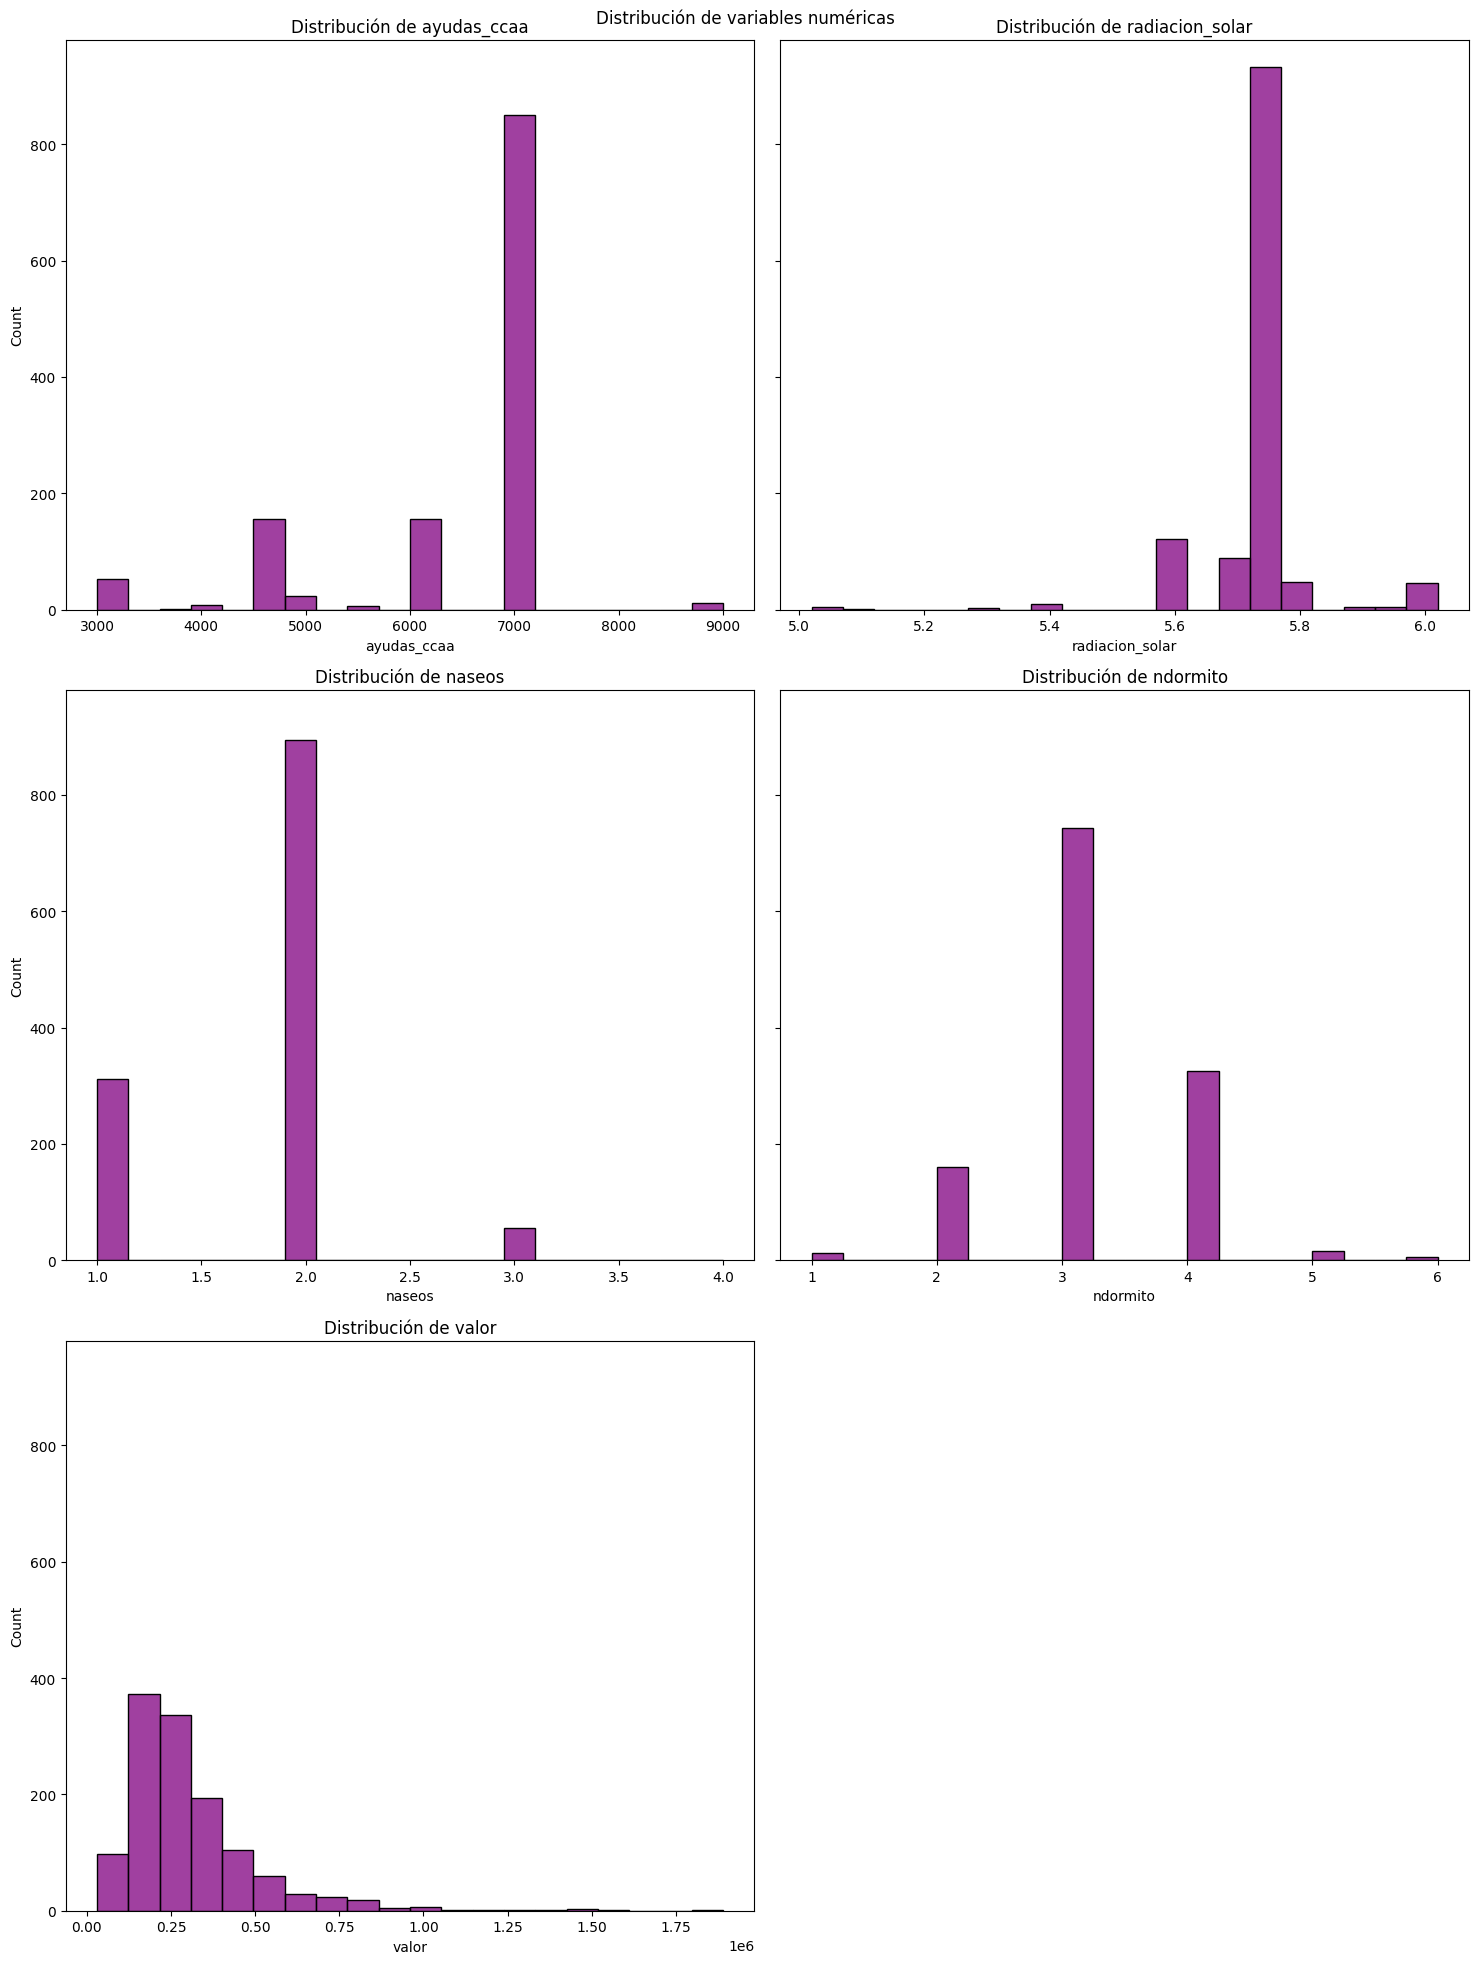

In [158]:
visualizador=f.Visualizador(df_amplias)
visualizador.plot_numericas(color="purple", tamano_grafica=(15, 20))

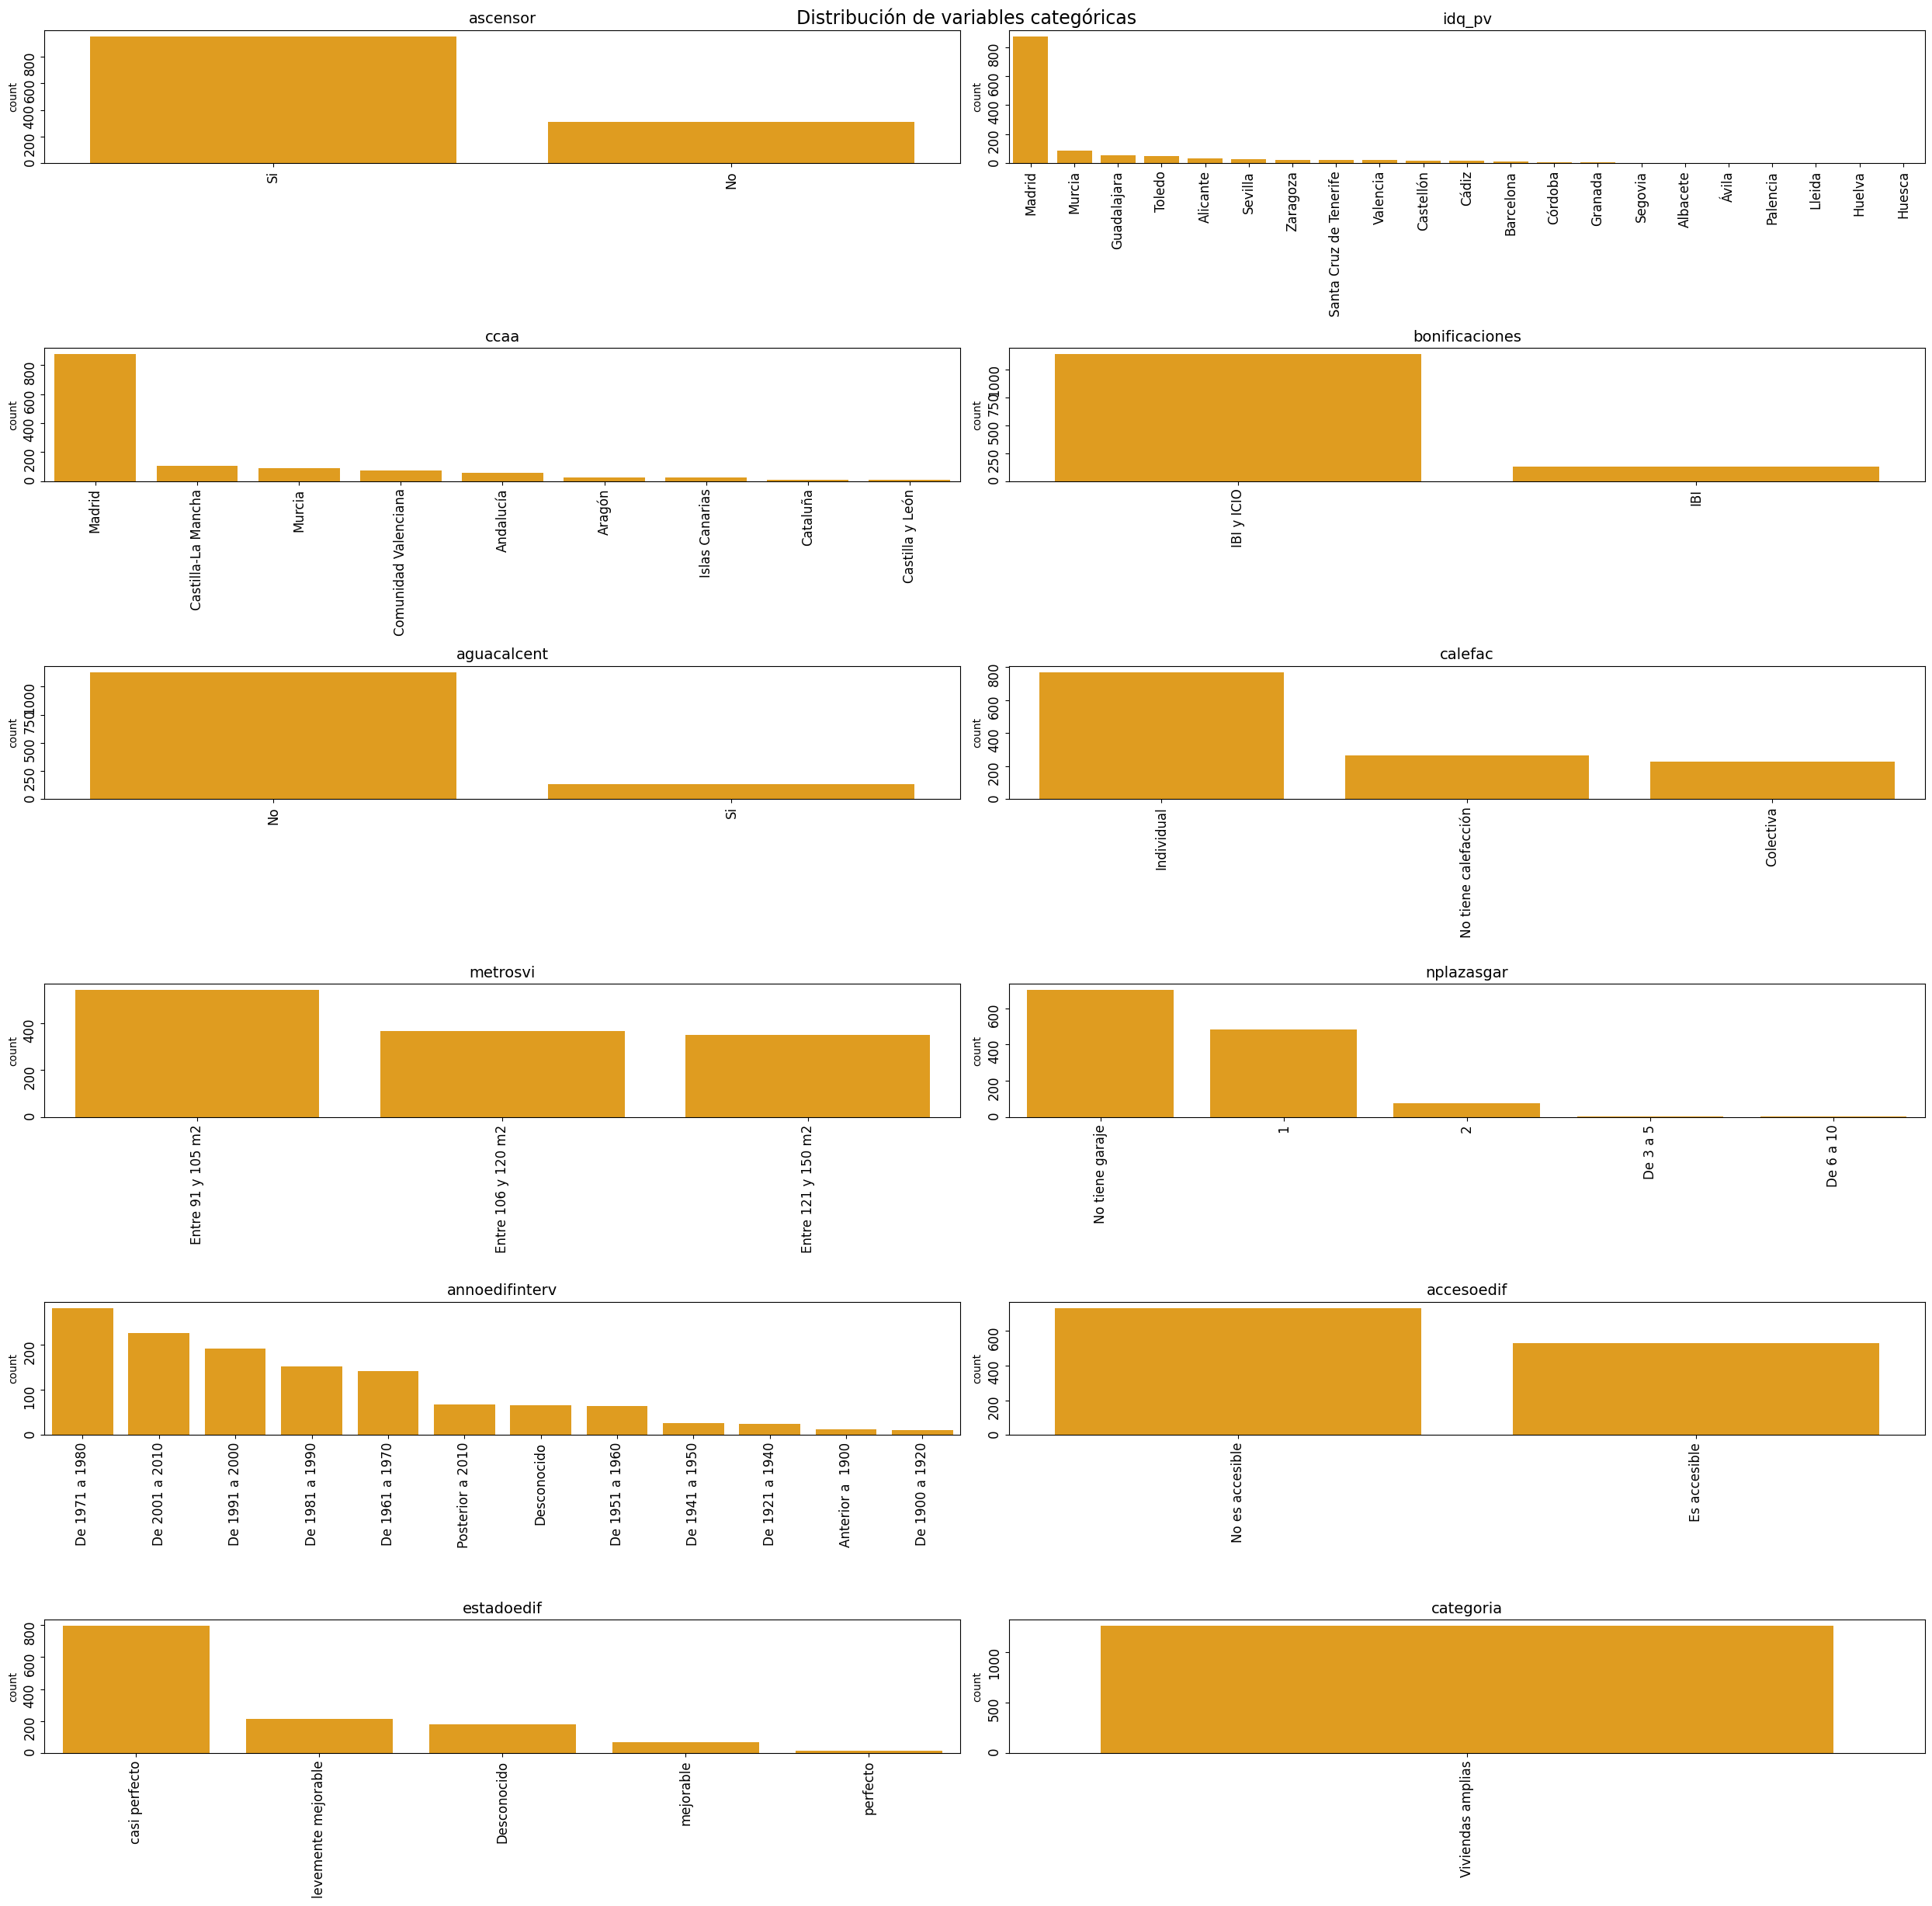

In [159]:
#Variables categóricas
visualizador.plot_categoricas( color="orange", tamanio_grafica=(25, 25), tamanio_fuente=12)

VEO LOS OUTLIERS (univariados) que ya son justificados y totalmente razonables

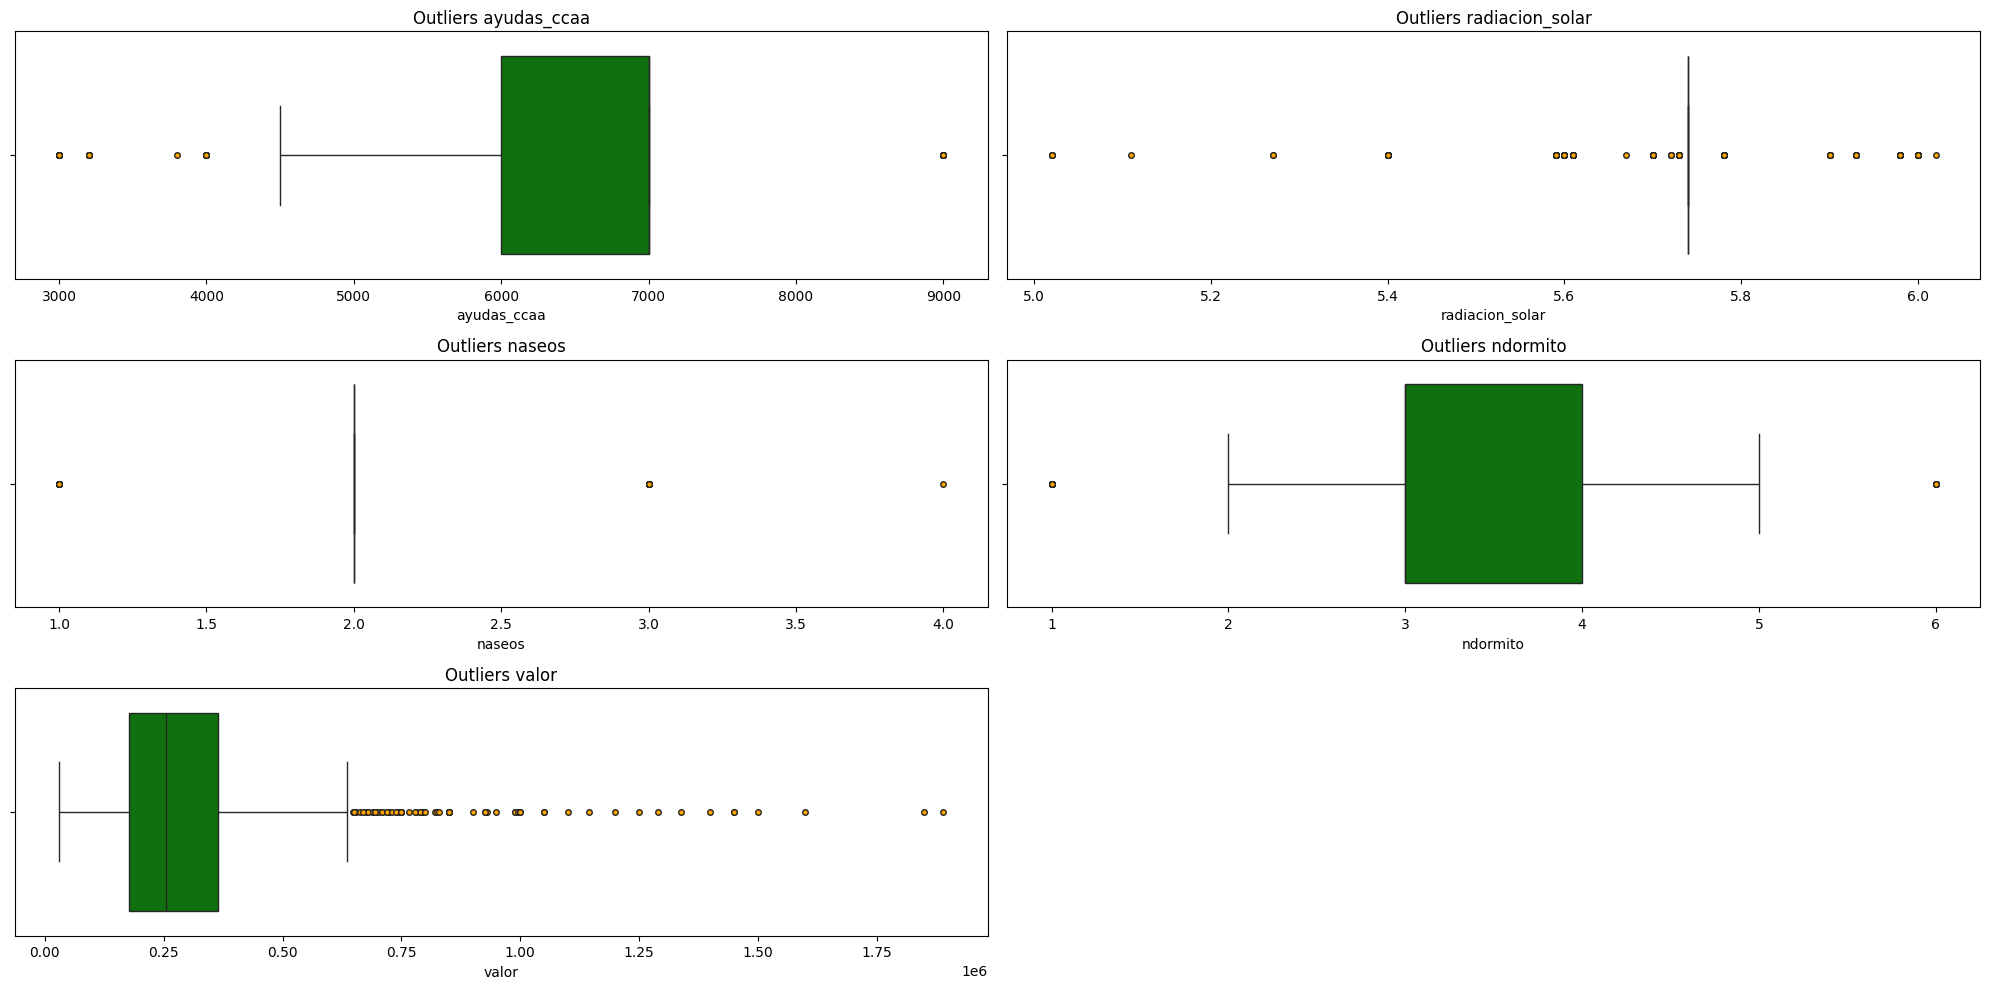

In [160]:
visualizador.deteccion_outliers(color="green")

VEO LAS CORRELACIONES

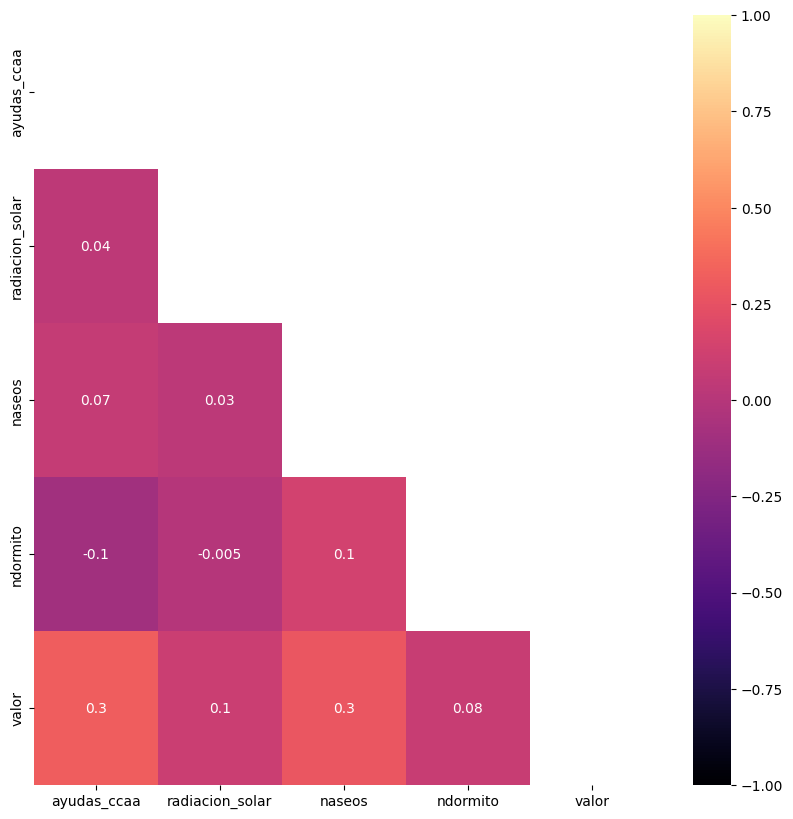

In [161]:
visualizador.correlacion(tamano_grafica=(10,10))

## FORMATEOS

In [163]:
df_amplias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1262 entries, 0 to 3884
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ascensor         1262 non-null   object 
 1   idq_pv           1262 non-null   object 
 2   ccaa             1262 non-null   object 
 3   ayudas_ccaa      1262 non-null   int64  
 4   bonificaciones   1262 non-null   object 
 5   radiacion_solar  1262 non-null   float64
 6   aguacalcent      1262 non-null   object 
 7   calefac          1262 non-null   object 
 8   metrosvi         1262 non-null   object 
 9   naseos           1262 non-null   int64  
 10  ndormito         1262 non-null   int64  
 11  valor            1262 non-null   int64  
 12  nplazasgar       1262 non-null   object 
 13  annoedifinterv   1262 non-null   object 
 14  accesoedif       1262 non-null   object 
 15  estadoedif       1262 non-null   object 
 16  categoria        1262 non-null   object 
dtypes: float64(1), int6

In [164]:
columnas_a_formatear = ["naseos", "ndormito"]                      #columnas a formatear a tipo "O"

df_amplias[columnas_a_formatear] = df_amplias[columnas_a_formatear].astype("O")

In [165]:
df_amplias.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1262 entries, 0 to 3884
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ascensor         1262 non-null   object 
 1   idq_pv           1262 non-null   object 
 2   ccaa             1262 non-null   object 
 3   ayudas_ccaa      1262 non-null   int64  
 4   bonificaciones   1262 non-null   object 
 5   radiacion_solar  1262 non-null   float64
 6   aguacalcent      1262 non-null   object 
 7   calefac          1262 non-null   object 
 8   metrosvi         1262 non-null   object 
 9   naseos           1262 non-null   object 
 10  ndormito         1262 non-null   object 
 11  valor            1262 non-null   int64  
 12  nplazasgar       1262 non-null   object 
 13  annoedifinterv   1262 non-null   object 
 14  accesoedif       1262 non-null   object 
 15  estadoedif       1262 non-null   object 
 16  categoria        1262 non-null   object 
dtypes: float64(1), int6

# **DETECCIÓN DE OUTLIERS USANDO ISOLATION FOREST (IF)**

In [166]:
outliers_amp=d.GestionOutliersMultivariados(df_amplias)
df_outampli=outliers_amp.detectar_outliers_if(0.01)

In [167]:
df_outampli.head()

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif,categoria,outlier
0,Si,Albacete,Castilla-La Mancha,4500,IBI y ICIO,5.72,Si,Colectiva,Entre 121 y 150 m2,2,3,249000,No tiene garaje,De 1971 a 1980,Es accesible,Desconocido,Viviendas amplias,1
1,Si,Albacete,Castilla-La Mancha,4500,IBI y ICIO,5.72,No,Individual,Entre 121 y 150 m2,2,3,250000,1,De 1971 a 1980,Es accesible,Desconocido,Viviendas amplias,1
2,Si,Albacete,Castilla-La Mancha,4500,IBI y ICIO,5.72,No,Individual,Entre 91 y 105 m2,2,3,223600,No tiene garaje,De 1981 a 1990,Es accesible,casi perfecto,Viviendas amplias,1
5,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 91 y 105 m2,1,3,110000,No tiene garaje,De 1981 a 1990,Es accesible,casi perfecto,Viviendas amplias,1
6,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 106 y 120 m2,1,3,135000,No tiene garaje,Desconocido,No es accesible,Desconocido,Viviendas amplias,1


In [168]:
df_outampli[df_outampli["outlier"]==-1].shape[0]

13

In [169]:
df_outampli[df_outampli["outlier"]==-1]

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif,categoria,outlier
107,Si,Barcelona,Cataluña,9000,IBI,5.40,No,Individual,Entre 106 y 120 m2,2,3,359900,No tiene garaje,De 1991 a 2000,Es accesible,casi perfecto,Viviendas amplias,-1
113,Si,Barcelona,Cataluña,9000,IBI,5.40,No,Individual,Entre 91 y 105 m2,2,4,384000,No tiene garaje,De 1961 a 1970,Es accesible,levemente mejorable,Viviendas amplias,-1
116,Si,Barcelona,Cataluña,9000,IBI,5.40,No,No tiene calefacción,Entre 91 y 105 m2,1,4,420000,No tiene garaje,De 1961 a 1970,Es accesible,casi perfecto,Viviendas amplias,-1
117,Si,Barcelona,Cataluña,9000,IBI,5.40,No,Individual,Entre 106 y 120 m2,2,4,460000,No tiene garaje,De 1971 a 1980,Es accesible,casi perfecto,Viviendas amplias,-1
118,No,Barcelona,Cataluña,9000,IBI,5.40,No,Individual,Entre 121 y 150 m2,2,2,598000,No tiene garaje,De 1900 a 1920,No es accesible,casi perfecto,Viviendas amplias,-1
125,Si,Barcelona,Cataluña,9000,IBI,5.40,No,Individual,Entre 91 y 105 m2,1,3,330000,No tiene garaje,De 1991 a 2000,Es accesible,casi perfecto,Viviendas amplias,-1
127,Si,Barcelona,Cataluña,9000,IBI,5.40,No,Individual,Entre 91 y 105 m2,2,3,450000,No tiene garaje,De 1961 a 1970,No es accesible,casi perfecto,Viviendas amplias,-1
139,Si,Barcelona,Cataluña,9000,IBI,5.40,No,Individual,Entre 91 y 105 m2,1,2,343000,No tiene garaje,De 1961 a 1970,No es accesible,casi perfecto,Viviendas amplias,-1
646,Si,Madrid,Madrid,7000,IBI y ICIO,5.74,No,Individual,Entre 121 y 150 m2,3,3,1849000,2,De 1971 a 1980,Es accesible,casi perfecto,Viviendas amplias,-1
1475,Si,Madrid,Madrid,7000,IBI y ICIO,5.74,Si,Colectiva,Entre 121 y 150 m2,3,4,1600000,1,De 1971 a 1980,Es accesible,casi perfecto,Viviendas amplias,-1


Filtramos por los que no son outliers

In [170]:
df_sin_outamplias=df_outampli[df_outampli["outlier"]!=-1]

In [171]:
df_sin_outamplias.shape[0]

1249

In [172]:
df_sin_outamplias.drop(columns=["outlier", "categoria"], inplace=True)

In [173]:
df_sin_outamplias.reset_index(drop=True, inplace=True)

In [174]:
df_sin_outamplias.head()

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif
0,Si,Albacete,Castilla-La Mancha,4500,IBI y ICIO,5.72,Si,Colectiva,Entre 121 y 150 m2,2,3,249000,No tiene garaje,De 1971 a 1980,Es accesible,Desconocido
1,Si,Albacete,Castilla-La Mancha,4500,IBI y ICIO,5.72,No,Individual,Entre 121 y 150 m2,2,3,250000,1,De 1971 a 1980,Es accesible,Desconocido
2,Si,Albacete,Castilla-La Mancha,4500,IBI y ICIO,5.72,No,Individual,Entre 91 y 105 m2,2,3,223600,No tiene garaje,De 1981 a 1990,Es accesible,casi perfecto
3,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 91 y 105 m2,1,3,110000,No tiene garaje,De 1981 a 1990,Es accesible,casi perfecto
4,Si,Alicante,Comunidad Valenciana,6000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 106 y 120 m2,1,3,135000,No tiene garaje,Desconocido,No es accesible,Desconocido


In [175]:
df_sin_outamplias.to_pickle("../datos/red_piso/Datos_formateados/amplias_formateadas.pkl")

# **VIVIENDAS GRANDES**

In [176]:
df_grandes.head()

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif,categoria
14,No,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,Individual,Más de 180 m2,2,4,335000,De 3 a 5,De 2001 a 2010,No es accesible,casi perfecto,Viviendas grandes
15,No,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,No tiene calefacción,Más de 180 m2,4,11,440000,De 3 a 5,Desconocido,Es accesible,levemente mejorable,Viviendas grandes
17,Si,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,Individual,Más de 180 m2,3,4,499900,1,De 1981 a 1990,Es accesible,casi perfecto,Viviendas grandes
19,No,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,Individual,Más de 180 m2,3,5,199000,No tiene garaje,De 1981 a 1990,No es accesible,casi perfecto,Viviendas grandes
24,No,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 151 y 180 m2,1,3,169000,No tiene garaje,De 1981 a 1990,No es accesible,levemente mejorable,Viviendas grandes


# **EDA**

In [177]:
f.exploracion_dataframe(df_grandes,"valor")

El número de datos es 530 y el de columnas es 17

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 1

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
ascensor,object
idq_pv,object
ccaa,object
ayudas_ccaa,int64
bonificaciones,object
radiacion_solar,float64
aguacalcent,object
calefac,object
metrosvi,object
naseos,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna ASCENSOR tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
ascensor,
No,361
Si,169


La columna IDQ_PV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 20 categorías (5/20)


,count
idq_pv,
Madrid,354
Toledo,42
Murcia,29
Guadalajara,23
Castellón,16


La columna CCAA tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 10 categorías (5/10)


,count
ccaa,
Madrid,354
Castilla-La Mancha,66
Comunidad Valenciana,31
Murcia,29
Andalucía,27


La columna BONIFICACIONES tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
bonificaciones,
IBI y ICIO,486
IBI,44


La columna AGUACALCENT tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
aguacalcent,
No,479
Si,51


La columna CALEFAC tiene los siguientes valores únicos:
Mostrando 3 categorías con más valores del total de 3 categorías (3/3)


,count
calefac,
Individual,358
No tiene calefacción,101
Colectiva,71


La columna METROSVI tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
metrosvi,
Más de 180 m2,373
Entre 151 y 180 m2,157


La columna NPLAZASGAR tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 5 categorías (5/5)


,count
nplazasgar,
1,199
No tiene garaje,170
2,102
De 3 a 5,50
De 6 a 10,9


La columna ANNOEDIFINTERV tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 12 categorías (5/12)


,count
annoedifinterv,
De 2001 a 2010,108
De 1991 a 2000,108
De 1961 a 1970,58
De 1981 a 1990,56
De 1971 a 1980,52


La columna ACCESOEDIF tiene los siguientes valores únicos:
Mostrando 2 categorías con más valores del total de 2 categorías (2/2)


,count
accesoedif,
No es accesible,387
Es accesible,143


La columna ESTADOEDIF tiene los siguientes valores únicos:
Mostrando 5 categorías con más valores del total de 5 categorías (5/5)


,count
estadoedif,
casi perfecto,317
levemente mejorable,99
Desconocido,78
mejorable,32
perfecto,4


La columna CATEGORIA tiene los siguientes valores únicos:
Mostrando 1 categorías con más valores del total de 1 categorías (1/1)


,count
categoria,
Viviendas grandes,530



----------

Las principales estadísticas de las variables númericas son:


,count,mean,std,min,25%,50%,75%,max
ayudas_ccaa,530.0,5451.886792,1416.766409,3000.0,4500.00,5000.00,7000.00,7000.0
radiacion_solar,530.0,5.727358,0.107981,4.8,5.74,5.74,5.74,6.0
naseos,530.0,2.630189,0.942102,1.0,2.00,3.00,3.00,7.0
ndormito,530.0,4.213208,1.495366,1.0,3.00,4.00,5.00,20.0
valor,530.0,509734.601887,511103.696888,35000.0,250000.00,394450.00,599000.00,6600000.0



----------

Las principales estadísticas de las variables categóricas son:


,count,unique,top,freq
ascensor,530,2,No,361
idq_pv,530,20,Madrid,354
ccaa,530,10,Madrid,354
bonificaciones,530,2,IBI y ICIO,486
aguacalcent,530,2,No,479
calefac,530,3,Individual,358
metrosvi,530,2,Más de 180 m2,373
nplazasgar,530,5,1,199
annoedifinterv,530,12,De 2001 a 2010,108
accesoedif,530,2,No es accesible,387



----------

Las características principales del dataframe son:
<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 14 to 3876
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ascensor         530 non-null    object 
 1   idq_pv           530 non-null    object 
 2   ccaa             530 non-null    object 
 3   ayudas_ccaa      530 non-null    int64  
 4   bonificaciones   530 non-null    object 
 5   radiacion_solar  530 non-null    float64
 6   aguacalcent      530 non-null    object 
 7   calefac          530 non-null    object 
 8   metrosvi         530 non-null    object 
 9   naseos           530 non-null    int64  
 10  ndormito         530 non-null    int64  
 11  valor            530 non-null    int64  
 12  nplazasgar       530 non-null    object 
 13  annoedifinterv   530 non-null    object 
 14  accesoedif       530 non-null    object 
 15  estadoedif       530 non-null    object 
 16  c

None

Lo que he podido ver hasta el momento es que a simple vista no parece haber muchos outliers ya que se distorsiona muy levemente la media. Si eso se aprecia un sesgo en la media del valor de la vivienda debido a las viviendas más caras con respecto a la moda.

In [178]:
df_grandes["metrosvi"].unique()

array(['Más de 180 m2', 'Entre 151 y 180 m2'], dtype=object)

In [179]:
df_grandes["ndormito"].value_counts()  #observamos que en las viendas grandes el numero de habitaciones es coherente

ndormito
4     223
3     129
5      95
6      40
2      14
7      14
1       5
8       3
9       2
10      2
11      1
15      1
20      1
Name: count, dtype: int64

***Observamos el estado de las viviendas por si vemos algo raro***

In [181]:
df_grandes["estadoedif"].value_counts()

estadoedif
casi perfecto          317
levemente mejorable     99
Desconocido             78
mejorable               32
perfecto                 4
Name: count, dtype: int64

In [182]:
df_grandes["naseos"].value_counts()  #observamos que en las viendas grandes el numero de aseos es coherente

naseos
2    209
3    197
4     64
1     44
5     13
7      2
6      1
Name: count, dtype: int64

VEO LA DISTRIBUCIÓN DE LAS VARIABLES NUMÉRICAS

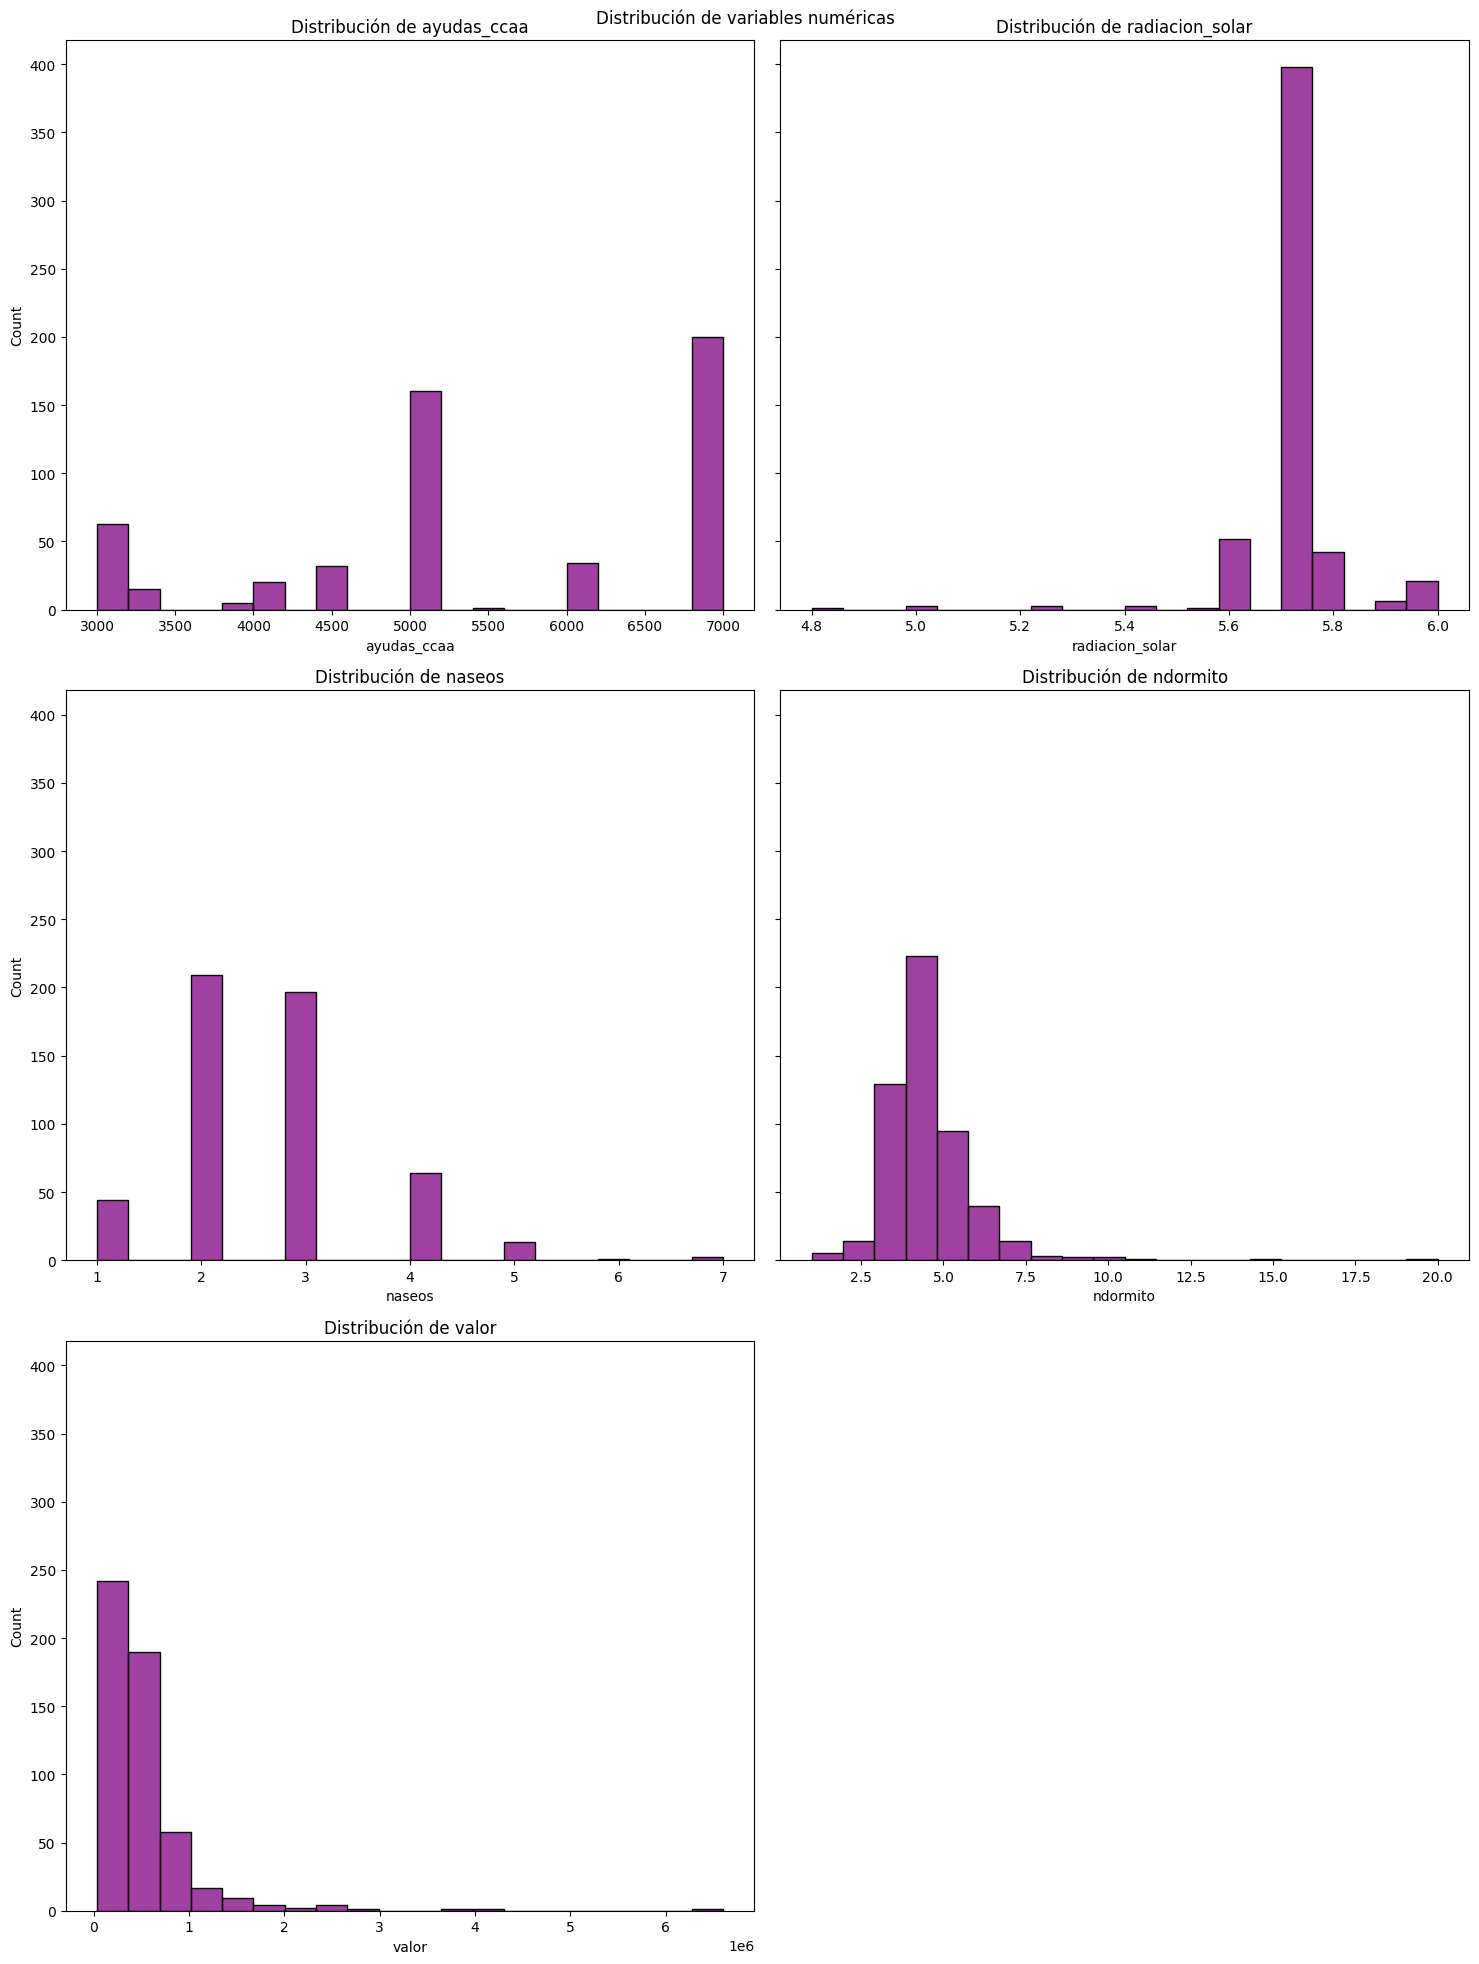

In [183]:
visualizador=f.Visualizador(df_grandes)
visualizador.plot_numericas(color="purple", tamano_grafica=(15, 20))

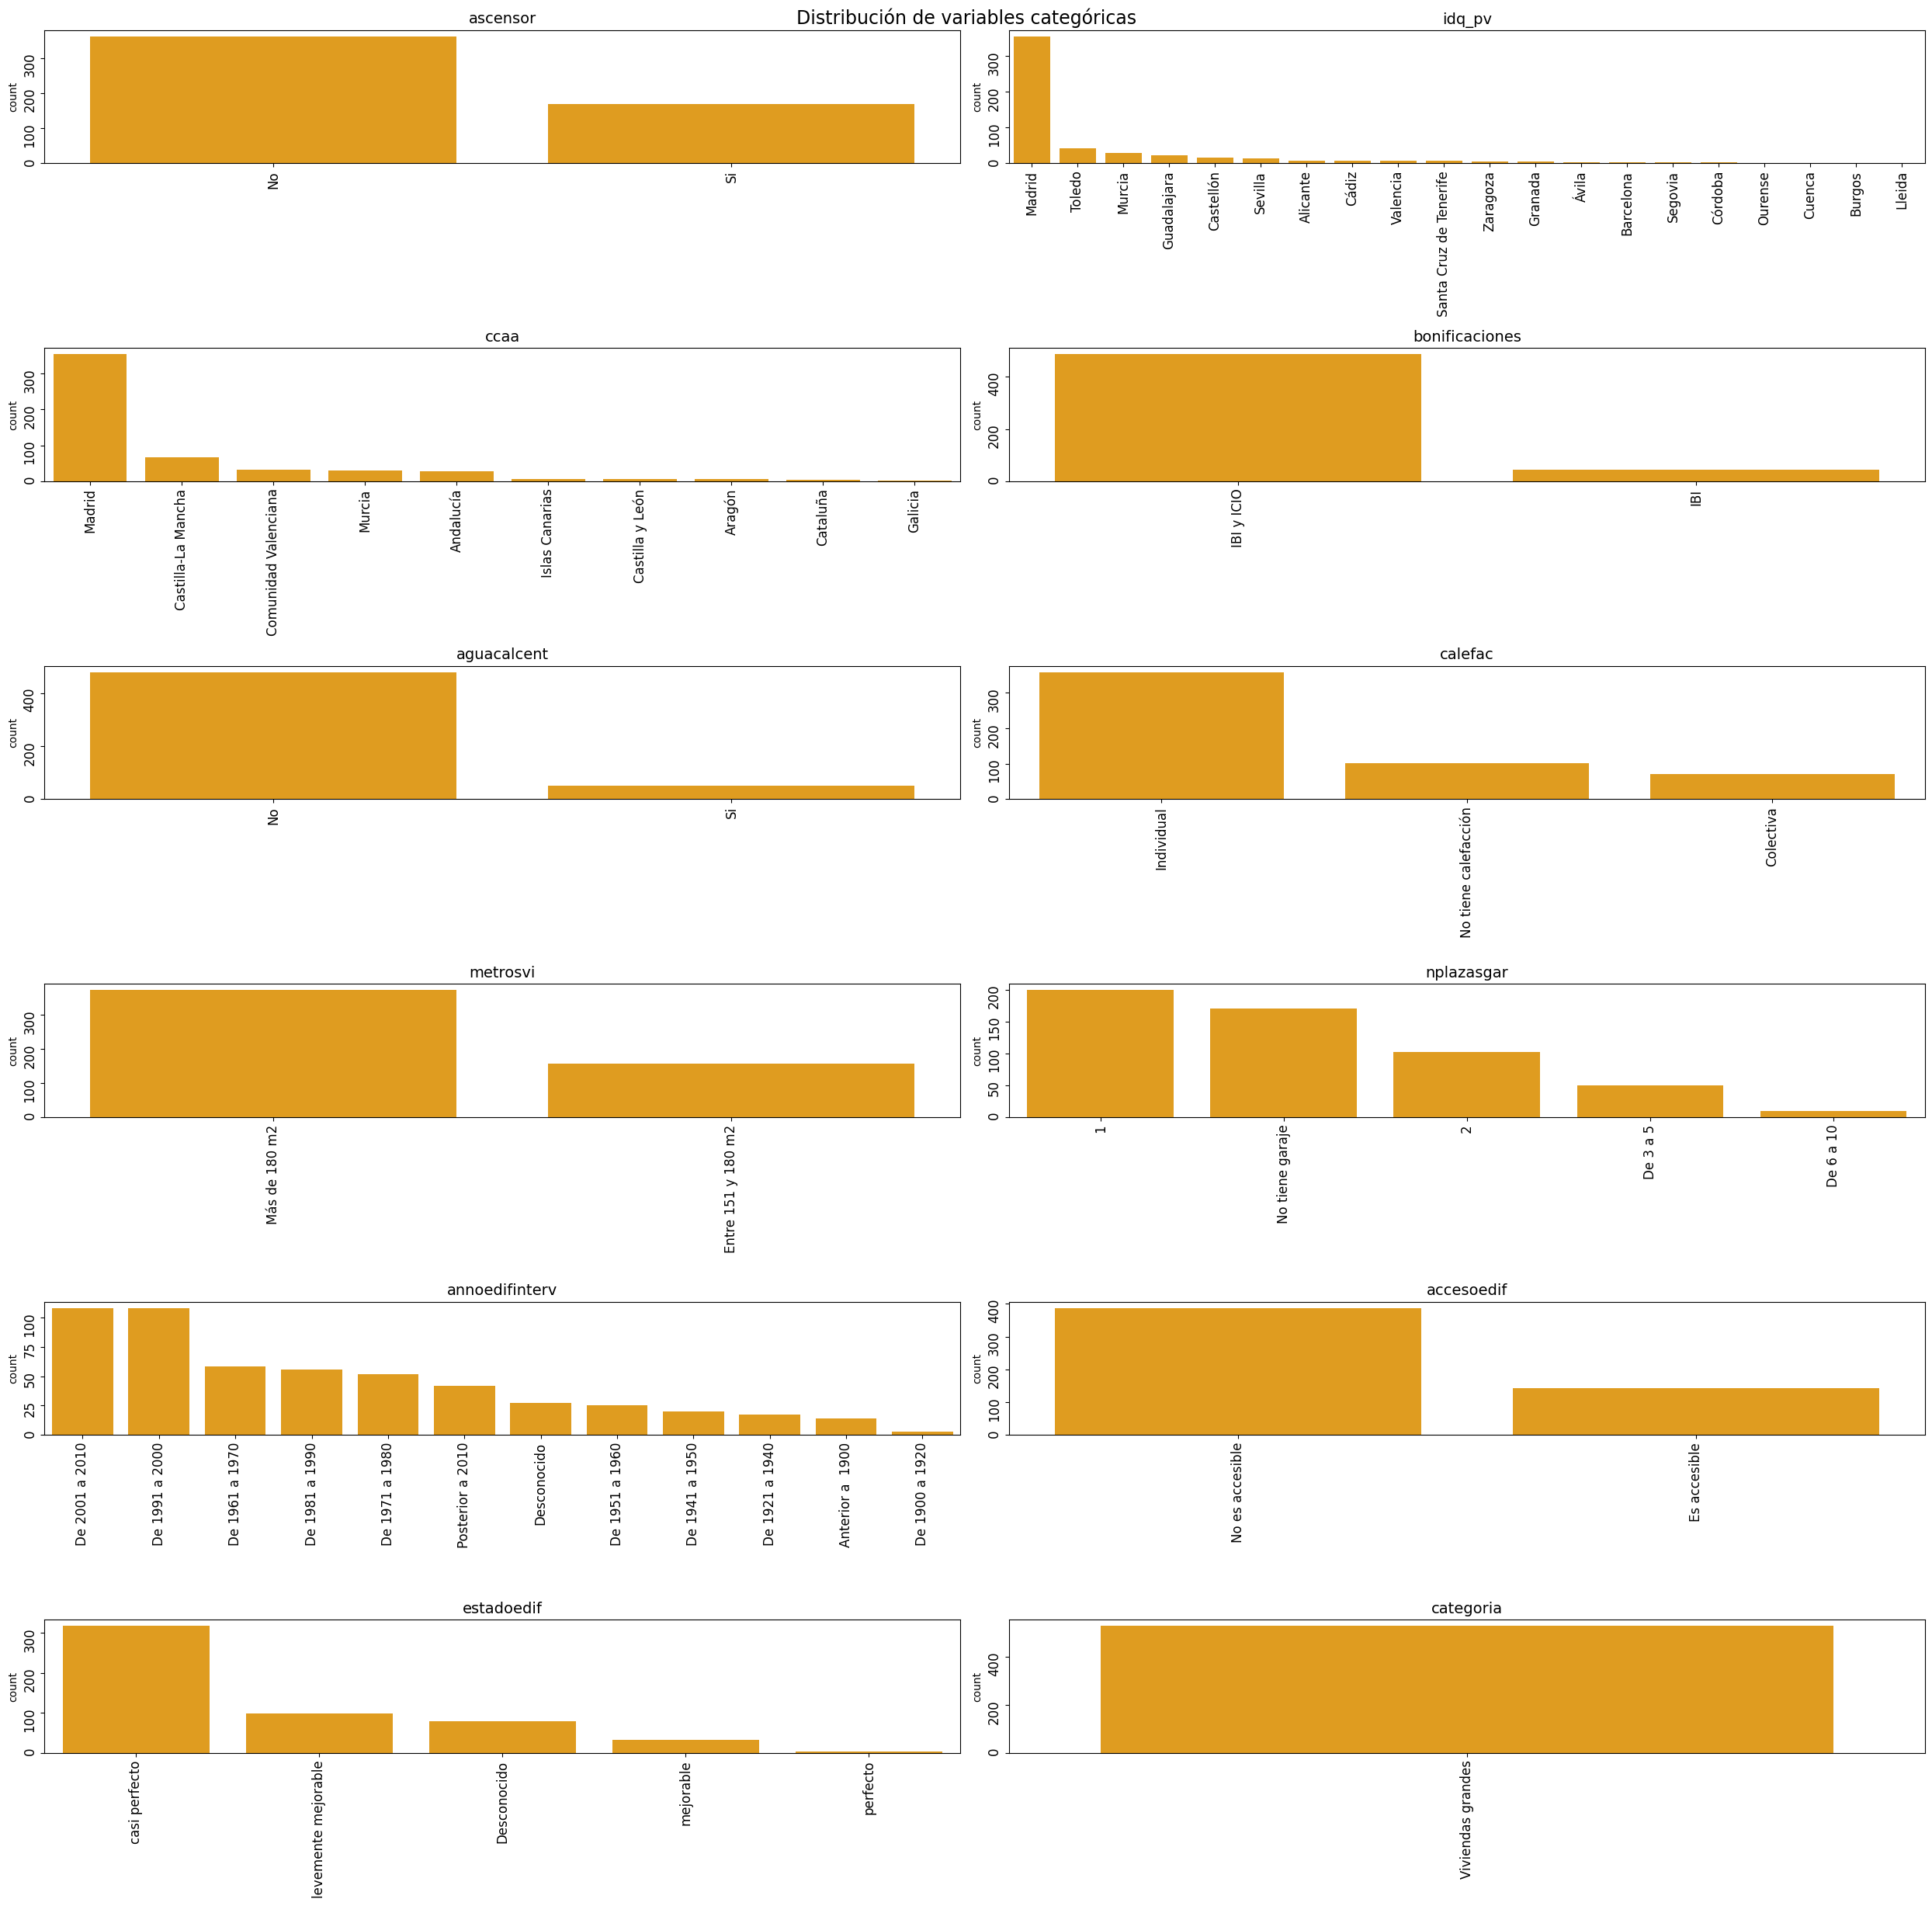

In [184]:
#Variables categóricas
visualizador.plot_categoricas( color="orange", tamanio_grafica=(25, 25), tamanio_fuente=12)

VEO LOS OUTLIERS (univariados) que ya son justificados y totalmente razonables

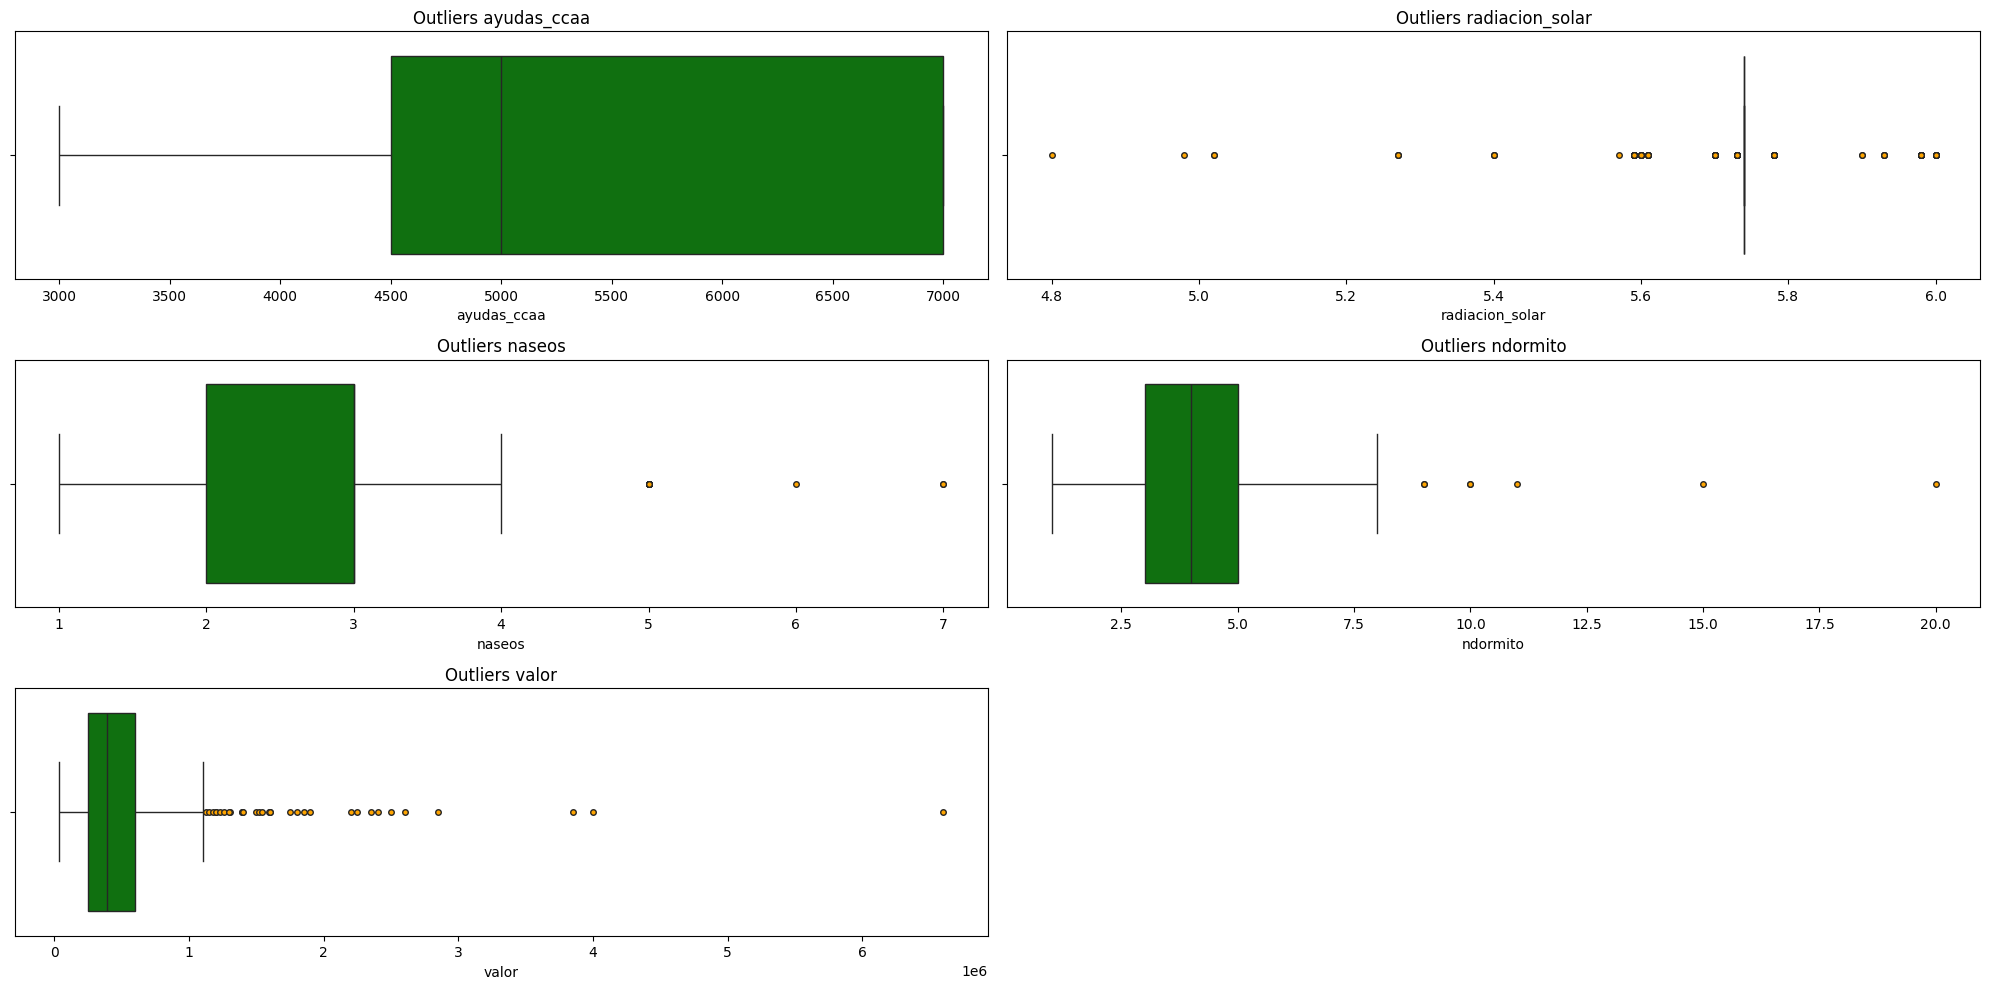

In [185]:
visualizador.deteccion_outliers(color="green")

VEO LAS CORRELACIONES

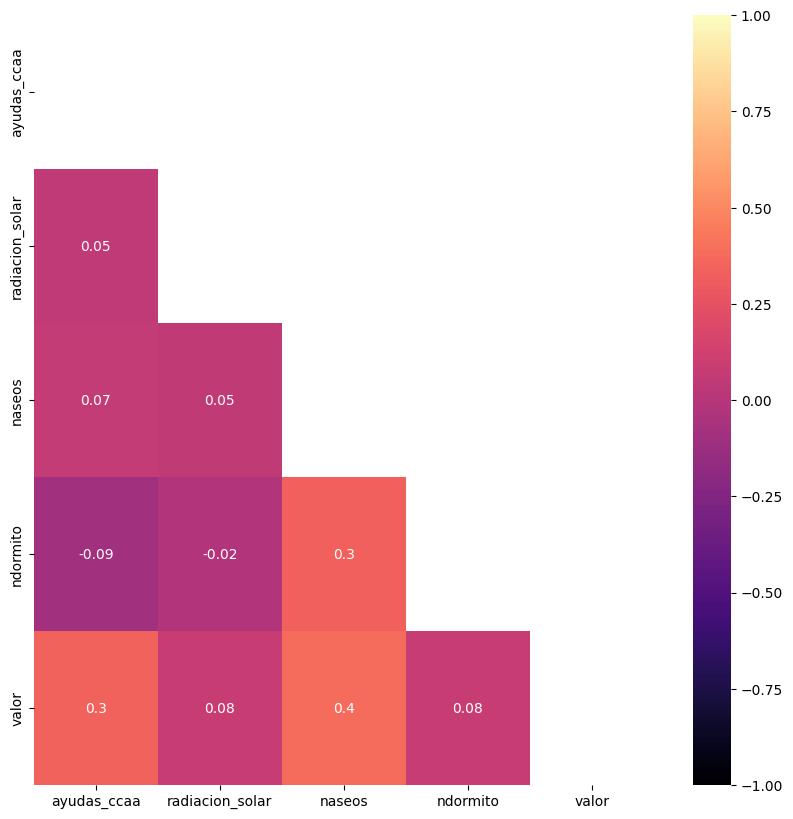

In [186]:
visualizador.correlacion(tamano_grafica=(10,10))

## FORMATEOS

In [188]:
df_grandes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 14 to 3876
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ascensor         530 non-null    object 
 1   idq_pv           530 non-null    object 
 2   ccaa             530 non-null    object 
 3   ayudas_ccaa      530 non-null    int64  
 4   bonificaciones   530 non-null    object 
 5   radiacion_solar  530 non-null    float64
 6   aguacalcent      530 non-null    object 
 7   calefac          530 non-null    object 
 8   metrosvi         530 non-null    object 
 9   naseos           530 non-null    int64  
 10  ndormito         530 non-null    int64  
 11  valor            530 non-null    int64  
 12  nplazasgar       530 non-null    object 
 13  annoedifinterv   530 non-null    object 
 14  accesoedif       530 non-null    object 
 15  estadoedif       530 non-null    object 
 16  categoria        530 non-null    object 
dtypes: float64(1), int6

In [189]:
columnas_a_formatear = ["naseos", "ndormito"]                      #columnas a formatear a tipo "O"

df_grandes[columnas_a_formatear] = df_grandes[columnas_a_formatear].astype("O")

In [190]:
df_grandes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 14 to 3876
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ascensor         530 non-null    object 
 1   idq_pv           530 non-null    object 
 2   ccaa             530 non-null    object 
 3   ayudas_ccaa      530 non-null    int64  
 4   bonificaciones   530 non-null    object 
 5   radiacion_solar  530 non-null    float64
 6   aguacalcent      530 non-null    object 
 7   calefac          530 non-null    object 
 8   metrosvi         530 non-null    object 
 9   naseos           530 non-null    object 
 10  ndormito         530 non-null    object 
 11  valor            530 non-null    int64  
 12  nplazasgar       530 non-null    object 
 13  annoedifinterv   530 non-null    object 
 14  accesoedif       530 non-null    object 
 15  estadoedif       530 non-null    object 
 16  categoria        530 non-null    object 
dtypes: float64(1), int6

# **DETECCIÓN DE OUTLIERS USANDO ISOLATION FOREST (IF)**

In [191]:
outliers_gra=d.GestionOutliersMultivariados(df_grandes)
df_outgrand=outliers_gra.detectar_outliers_if(0.01)

In [192]:
df_outgrand.head()

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif,categoria,outlier
14,No,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,Individual,Más de 180 m2,2,4,335000,De 3 a 5,De 2001 a 2010,No es accesible,casi perfecto,Viviendas grandes,1
15,No,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,No tiene calefacción,Más de 180 m2,4,11,440000,De 3 a 5,Desconocido,Es accesible,levemente mejorable,Viviendas grandes,1
17,Si,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,Individual,Más de 180 m2,3,4,499900,1,De 1981 a 1990,Es accesible,casi perfecto,Viviendas grandes,1
19,No,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,Individual,Más de 180 m2,3,5,199000,No tiene garaje,De 1981 a 1990,No es accesible,casi perfecto,Viviendas grandes,1
24,No,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 151 y 180 m2,1,3,169000,No tiene garaje,De 1981 a 1990,No es accesible,levemente mejorable,Viviendas grandes,1


In [193]:
df_outgrand[df_outgrand["outlier"]==-1].shape[0]

5

In [194]:
df_outgrand[df_outgrand["outlier"]==-1]

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif,categoria,outlier
142,Si,Burgos,Castilla y León,5500,IBI,4.98,No,Individual,Entre 151 y 180 m2,1,1,595000,No tiene garaje,Desconocido,No es accesible,casi perfecto,Viviendas grandes,-1
648,Si,Madrid,Madrid,7000,IBI y ICIO,5.74,Si,Colectiva,Más de 180 m2,3,4,3850000,2,De 1961 a 1970,No es accesible,casi perfecto,Viviendas grandes,-1
649,Si,Madrid,Madrid,7000,IBI y ICIO,5.74,Si,Colectiva,Más de 180 m2,5,4,6600000,1,De 1951 a 1960,Es accesible,casi perfecto,Viviendas grandes,-1
3224,Si,Madrid,Madrid,7000,IBI y ICIO,5.74,No,Individual,Más de 180 m2,5,5,4000000,No tiene garaje,De 1921 a 1940,Es accesible,casi perfecto,Viviendas grandes,-1
3468,No,Ourense,Galicia,5000,IBI y ICIO,4.80,No,No tiene calefacción,Más de 180 m2,2,6,70000,1,Desconocido,No es accesible,levemente mejorable,Viviendas grandes,-1


Filtramos por los que no son outliers

In [195]:
df_sin_outgrandes=df_outgrand[df_outgrand["outlier"]!=-1]

In [196]:
df_sin_outgrandes.shape[0]

525

In [197]:
df_sin_outgrandes.drop(columns=["outlier", "categoria"], inplace=True)

In [198]:
df_sin_outgrandes.reset_index(drop=True, inplace=True)

In [199]:
df_sin_outgrandes.head()

,ascensor,idq_pv,ccaa,ayudas_ccaa,bonificaciones,radiacion_solar,aguacalcent,calefac,metrosvi,naseos,ndormito,valor,nplazasgar,annoedifinterv,accesoedif,estadoedif
0,No,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,Individual,Más de 180 m2,2,4,335000,De 3 a 5,De 2001 a 2010,No es accesible,casi perfecto
1,No,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,No tiene calefacción,Más de 180 m2,4,11,440000,De 3 a 5,Desconocido,Es accesible,levemente mejorable
2,Si,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,Individual,Más de 180 m2,3,4,499900,1,De 1981 a 1990,Es accesible,casi perfecto
3,No,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,Individual,Más de 180 m2,3,5,199000,No tiene garaje,De 1981 a 1990,No es accesible,casi perfecto
4,No,Alicante,Comunidad Valenciana,4000,IBI y ICIO,5.73,No,No tiene calefacción,Entre 151 y 180 m2,1,3,169000,No tiene garaje,De 1981 a 1990,No es accesible,levemente mejorable


In [200]:
df_sin_outgrandes.to_pickle("../datos/red_piso/Datos_formateados/grandes_formateadas.pkl")